# (1) Business Case :

>- No-Churn Telecom has been in Europe for over 10 years, but new competitiors are making it tough to keep customers. Even though they have tried loweirng prices, more than 10% of customers are switching to other companies.

>- Now, they are thinking about using machine learning to figure out how to keep customers from leaving and stay ahead in the telecom game.

# (2) PROJECT GOAL :

### Help No-Churn with their use caes with Machine Learning :-
>- 1. Finding out why customers leave.

>- 2. Creating scores to predict who might leave.

>- 3. Using a "CHURN-FLAG" to quickly help and offer deals to customers who might leave.

>>- "CHURN-FLAG" is like a simple flag - it's either up for "YES" (might leave) or down for "NO"(probaly staying).
>>- It helps business know which customers might leave and need extra attention.

# (3) IMPORT BASIC LIBRARIES :

In [1]:
# Installing the 'PyMyQL' package uisng pip. 

!pip install pymysql

In [2]:
# Installing the 'mysql-connector' package using pip.

!pip install mysql-connector

In [3]:
# Importing NumPy for numerical opeartions.
import numpy as np

# Importing Pandas for data manipulation.
import pandas as pd

# Importing Seaborn for data visualization.
import seaborn as sns

# Importing Matplotlib for plotting.
import matplotlib.pyplot as plt

# Ensuring that plots appear in the notebook.
%matplotlib inline

# Imprting the MySQL Connector library.
import mysql.connector

# Ignoring warnings for cleaner output.
import warnings 

# Disabling warnings to keep the output.
warnings.filterwarnings("ignore")

# (4) LOADING THE DATASET THROUGH SQL :

## (4.1) Connecting the database

In [4]:
# Establishing a connection to the MySQL database.
db = mysql.connector.connect(

    # Database connection parameters.
    
    # MYSQL server IP address.
    host = '18.136.157.135',

    # Database username.
    user = 'dm_team3',

    # Database password.
    password = 'DM!$!Team!27@9!20&',

    # Database name.
    database = 'project_telecom'
)

## (4.2) Reading the list of tables from MySQL database using pandas

In [5]:
# Assuming 'db' is a MySQL connection object.
# Executing a SQL query to get the list of tables in the database.
table = pd.read_sql_query('SHOW TABLES', db)

# Displaying the result.
print(table)

  Tables_in_project_telecom
0        telecom_churn_data


## (4.3) Getting all data from a MySQL table using pandas.

In [6]:
# Here, 'db' is the database connection.
# Read data from the 'telecom_churn_data' table in the database.
data = pd.read_sql("select * from telecom_churn_data", db)

# Displaying the loaded data.
data

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


## (4.4) Displaying all rows and columns in the output.

In [7]:
# setting the options to display all rows in the output.
# pd.set_option("display.max_rows", None)

# # Setting the options to display all columns in the output.
# pd.set_option("display.max_columns", None)

# Printing the loaded data.
data

,columns1,columns2,columns3,columns4,columns5,columns6,columns7,columns8,columns9,columns10,...,columns12,columns13,columns14,columns15,columns16,columns17,columns18,columns19,columns20,columns21
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


In [8]:
# Displaying all the columns.

data.columns

Index(['columns1', 'columns2', 'columns3', 'columns4', 'columns5', 'columns6',
       'columns7', 'columns8', 'columns9', 'columns10', 'columns11',
       'columns12', 'columns13', 'columns14', 'columns15', 'columns16',
       'columns17', 'columns18', 'columns19', 'columns20', 'columns21'],
      dtype='object')

**Insights :**
>- There are 4316 rows and 21 columns, including the final target.

>- The columns names were fixed because they were not named properly.

## (4.5) Renaming columns in the 'data' DataFrame using a dictionary.

In [9]:
# Renaming columns in the 'data' DataFrame 

data.rename(columns = {
    'columns1' : 'state',
    'columns2' : 'account_length',
    'columns3' : 'area_code',
    'columns4' : 'phone',
    'columns5' : 'international_plan',
    'columns6' : 'vmail_plan',
    'columns7' : 'vmail_message',
    'columns8' : 'day_mins',
    'columns9' : 'day_calls',
    'columns10' : 'day_charge',
    'columns11' : 'eve_mins',
    'columns12' : 'eve_calls',
    'columns13' : 'eve_charge',
    'columns14' : 'night_mins',
    'columns15' : 'night_calls',
    'columns16' : 'night_charge',
    'columns17' : 'international_mins',
    'columns18' : 'international_calls',
    'columns19' : 'international_charge',
    'columns20' : 'custserv_calls',
    'columns21' : 'churn'
}, inplace = True)

In [10]:
# Displaying the details of 'data'.

data

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custserv_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.


# (5) BASIC CHECKS :

## (5.1) Checking size of the database.

In [11]:
data.size

96957

## (5.2) Checking no. of rows and columns.

In [12]:
data.shape

(4617, 21)

## (5.3) Printing first 5 rows.

In [13]:
data.head()

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custserv_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10,3,2.7,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.3,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.9,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [14]:
# Here, 'T' is used to transpose the DataFrame.

data.head().T

,0,1,2,3,4
state,KS,OH,NJ,OH,OK
account_length,128,107,137,84,75
area_code,415,415,415,408,415
phone,382-4657,371-7191,358-1921,375-9999,330-6626
international_plan,no,no,no,yes,yes
vmail_plan,yes,yes,no,no,no
vmail_message,25,26,0,0,0
day_mins,265.1,161.6,243.4,299.4,166.7
day_calls,110,123,114,71,113
day_charge,45.07,27.47,41.38,50.9,28.34


## (5.4) Printing last 5 rows.

In [15]:
data.tail()

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custserv_calls,churn
4612,NY,57,510,345-7512,no,yes,25,144,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.3,3,False.
4613,NM,177,408,343-6820,no,yes,29,189,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,False.
4614,VT,67,408,338-4794,no,yes,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13,3,3.51,1,False.
4615,MI,98,415,355-8388,no,yes,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,False.
4616,IN,140,415,409-6884,no,no,0,204.7,100,34.8,...,107,10.78,202.8,115,9.13,12.1,4,3.27,2,False.


## (5.5) Printing data type of each column

In [16]:
data.dtypes

state                   object
account_length          object
area_code               object
phone                   object
international_plan      object
vmail_plan              object
vmail_message           object
day_mins                object
day_calls               object
day_charge              object
eve_mins                object
eve_calls               object
eve_charge              object
night_mins              object
night_calls             object
night_charge            object
international_mins      object
international_calls     object
international_charge    object
custserv_calls          object
churn                   object
dtype: object

## (5.6) Check memory usage

In [17]:
# Displays details like column names, data types, and non-null counts for each column

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 4617 non-null   object
 1   account_length        4617 non-null   object
 2   area_code             4617 non-null   object
 3   phone                 4617 non-null   object
 4   international_plan    4617 non-null   object
 5   vmail_plan            4617 non-null   object
 6   vmail_message         4617 non-null   object
 7   day_mins              4617 non-null   object
 8   day_calls             4617 non-null   object
 9   day_charge            4617 non-null   object
 10  eve_mins              4617 non-null   object
 11  eve_calls             4617 non-null   object
 12  eve_charge            4617 non-null   object
 13  night_mins            4617 non-null   object
 14  night_calls           4617 non-null   object
 15  night_charge          4617 non-null   

## (5.7) Printing all the columns

In [18]:
data.columns

Index(['state', 'account_length', 'area_code', 'phone', 'international_plan',
       'vmail_plan', 'vmail_message', 'day_mins', 'day_calls', 'day_charge',
       'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls',
       'night_charge', 'international_mins', 'international_calls',
       'international_charge', 'custserv_calls', 'churn'],
      dtype='object')

## (5.8) Description of all the columns

In [19]:
# It will calculate various summary statistics (count, mean, std, min, 25%, 50%, 75%, max) for various columns.

data.describe()

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custserv_calls,churn
count,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617,...,4617,4617,4617,4617,4617,4617,4617,4617,4617,4617
unique,51,218,3,4617,2,2,47,1901,123,1901,...,125,1621,1813,130,1012,168,21,168,10,2
top,WV,90,415,382-4657,no,no,0,154,102,26.18,...,105,14.25,194.3,105,9.66,9.8,3,2.65,1,False.
freq,149,63,2299,1,4171,3381,3381,10,108,10,...,111,15,10,115,19,81,925,81,1651,3961


In [20]:
# '.T' will transpose the result by swapping rows and columns.
# After which it will be more easier to analyze it.

data.describe().T

,count,unique,top,freq
state,4617,51,WV,149
account_length,4617,218,90,63
area_code,4617,3,415,2299
phone,4617,4617,382-4657,1
international_plan,4617,2,no,4171
vmail_plan,4617,2,no,3381
vmail_message,4617,47,0,3381
day_mins,4617,1901,154,10
day_calls,4617,123,102,108
day_charge,4617,1901,26.18,10


# (6) DOMAIN ANALYSIS :

## (6.1) The dataset consists of 21 columns and 4617 rows.

**1. State :**
>- The customer's location within the USA.

**2. Account Length :**
>- The number of days the customer has been with the dedicated brand.

**3. Area Code :** 
>- The customer's area code.

**4. Phone :**
>- A unique identifier for the customer.

**5. International plan :**
>- It indicates whether the customer has an international plan or not.

**6. Vmail Plan :**
>- It Indicates whether the cutomer has a voicemail plan or not.

**7. Vmail Messages :**
>- The number of voice mail inbox messages the cutomer has.

**8. Day Mins :**
>- The total number of daytime minutes the cutomer has used.

**9. Day Calls :**
>- The number of calls the customer made during the day.

**10. Day Charge :**
>- How much the customer spent on using daytime services.

**11. Eve Mins :**
>- The total number of evening minutes the customer used.

**12. Eve Calls :**
>- The number of calls the customer made during the evening.

**13. Eve Charge :**
>- How much the customer spent on using evening services.

**14. Night Mins :**
>- The total number of nighttime minutes the customer has used.

**15. Night Calls :**
>- The number of calls the customer made during the night.

**16. Night Charge :**
>- How much the customer spent on using night services.

**17. International Mins :**
>- The total number of international minutes the customer has used.

**18. International Calls :**
>- The number of international calls the customer made.

**19. International Charge :**
>- How much customer spent on international usage.

**20. Custserv Calls :**
>- The number of calls made by the customer to customer service.

**21. Churn :**
>- It likely indicates whether the customer has churned(cancelled their service) or not.

>- TRUE (Churned Customers)
>- FALSE (Retained Custimers)

# (7) DATA MANIPULATION AND CLEANING :

## (7.1) Converting categorical column to numerical column.

In [21]:
# Displaying the column names in the DataFrame.

data.columns

Index(['state', 'account_length', 'area_code', 'phone', 'international_plan',
       'vmail_plan', 'vmail_message', 'day_mins', 'day_calls', 'day_charge',
       'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls',
       'night_charge', 'international_mins', 'international_calls',
       'international_charge', 'custserv_calls', 'churn'],
      dtype='object')

In [22]:
# Displaying details like column names, data types, and non-null counts for each column.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 4617 non-null   object
 1   account_length        4617 non-null   object
 2   area_code             4617 non-null   object
 3   phone                 4617 non-null   object
 4   international_plan    4617 non-null   object
 5   vmail_plan            4617 non-null   object
 6   vmail_message         4617 non-null   object
 7   day_mins              4617 non-null   object
 8   day_calls             4617 non-null   object
 9   day_charge            4617 non-null   object
 10  eve_mins              4617 non-null   object
 11  eve_calls             4617 non-null   object
 12  eve_charge            4617 non-null   object
 13  night_mins            4617 non-null   object
 14  night_calls           4617 non-null   object
 15  night_charge          4617 non-null   

**Insights :**
>- Identifying the columns that are supposed to be in integer and float types.
>- converting the identified columns to their respective types (integer or float).

### (7.1.1) Converting object to integer column.

In [23]:
# Converting selected columns to integer type in 'data' DataFrame.
object_to_integer = ['account_length', 'area_code', 'vmail_message', 'day_calls', 
                      'eve_calls', 'night_calls', 'international_calls', 'custserv_calls']

# Looping through selected column. 
for column in object_to_integer:

    # Changing data type to integer.
    data[column] = data[column].astype(np.int64)

In [24]:
# Displaying details like column names, data types, and non-null counts for each column.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   state                 4617 non-null   object
 1   account_length        4617 non-null   int64 
 2   area_code             4617 non-null   int64 
 3   phone                 4617 non-null   object
 4   international_plan    4617 non-null   object
 5   vmail_plan            4617 non-null   object
 6   vmail_message         4617 non-null   int64 
 7   day_mins              4617 non-null   object
 8   day_calls             4617 non-null   int64 
 9   day_charge            4617 non-null   object
 10  eve_mins              4617 non-null   object
 11  eve_calls             4617 non-null   int64 
 12  eve_charge            4617 non-null   object
 13  night_mins            4617 non-null   object
 14  night_calls           4617 non-null   int64 
 15  night_charge          4617 non-null   

### (7.1.2) Converting object to float column.

In [25]:
# Converting specified columns to flsot type in 'data' DataFrame.
object_to_float = ['day_mins', 'day_charge', 'eve_mins', 'eve_charge',
                   'night_mins', 'night_charge', 'international_mins', 'international_charge']

# Looping through selected column.
for column in object_to_float :

    # Converting to float, handling errors as NaN.
    data[column] = pd.to_numeric(data[column], errors = 'coerce')

In [26]:
# Displaying details like column names, data types, and non-null counts for each column.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 4617 non-null   object 
 1   account_length        4617 non-null   int64  
 2   area_code             4617 non-null   int64  
 3   phone                 4617 non-null   object 
 4   international_plan    4617 non-null   object 
 5   vmail_plan            4617 non-null   object 
 6   vmail_message         4617 non-null   int64  
 7   day_mins              4617 non-null   float64
 8   day_calls             4617 non-null   int64  
 9   day_charge            4617 non-null   float64
 10  eve_mins              4617 non-null   float64
 11  eve_calls             4617 non-null   int64  
 12  eve_charge            4617 non-null   float64
 13  night_mins            4617 non-null   float64
 14  night_calls           4617 non-null   int64  
 15  night_charge         

# (7.2) Extracting numerical columns from the database.

In [27]:
# Here, We are selecting numerical columns (integer) from the 'data' DataFrame.

num_col = data.select_dtypes(include = ['int64', 'float64'])
num_col.columns

Index(['account_length', 'area_code', 'vmail_message', 'day_mins', 'day_calls',
       'day_charge', 'eve_mins', 'eve_calls', 'eve_charge', 'night_mins',
       'night_calls', 'night_charge', 'international_mins',
       'international_calls', 'international_charge', 'custserv_calls'],
      dtype='object')

In [28]:
# It will calculate various summary statistics with integer data type in the DataFrame. 
# It inclues count, unique, top and freq.

data.describe(include = ['int64', 'float64'])

,account_length,area_code,vmail_message,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custserv_calls
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### (7.2.1) Finding unique values and value counts in all numerical columns.

In [29]:
# Iterating over each numerical column in 'num_col'.
for i in num_col :

    # It will print unique values and column name.
    print(data[i].unique(), i)

    # It will print value counts for each unique value in the column.
    print(data[i].value_counts())

    # It will print a seperator for clarity.
    print("**********************")

[128 107 137  84  75 118 121 147 117 141  65  74 168  95  62 161  85  93
  76  73  77 130 111 132 174  57  54  20  49 142 172  12  72  36  78 136
 149  98 135  34 160  64  59 119  97  52  60  10  96  87  81  68 125 116
  38  40  43 113 126 150 138 162  90  50  82 144  46  70  55 106  94 155
  80 104  99 120 108 122 157 103  63 112  41 193  61  92 131 163  91 127
 110 140  83 145  56 151 139   6 115 146 185 148  32  25 179  67  19 170
 164  51 208  53 105  66  86  35  88 123  45 100 215  22  33 114  24 101
 143  48  71 167  89 199 166 158 196 209  16  39 173 129  44  79  31 124
  37 159 194 154  21 133 224  58  11 109 102 165  18  30 176  47 190 152
  26  69 186 171  28 153 169  13  27   3  42 189 156 134 243  23   1 205
 200   5   9 178 181 182 217 177 210  29 180   2  17   7 212 232 192 195
 197 225 184 191 201  15 183 202   8 175   4 188 204 221 187  14 238 216
 222 233] account_length
account_length
90     63
87     56
105    54
93     54
112    53
       ..
200     1
2       1
215 

## (7.3) Extracting categorical columns from the database

In [30]:
# Selecting columns with object data type in 'data' DataFrame.

# Filetring columns with object data type.
cat_col = data.select_dtypes(include = ['object'])

# Displaying the column names with object data type.
cat_col.columns

Index(['state', 'phone', 'international_plan', 'vmail_plan', 'churn'], dtype='object')

In [31]:
# It will calculate various summary statistics with object data type in the DataFrame. 
# It inclues count, unique, top and freq.

data.describe(include='object')

,state,phone,international_plan,vmail_plan,churn
count,4617,4617,4617,4617,4617
unique,51,4617,2,2,2
top,WV,382-4657,no,no,False.
freq,149,1,4171,3381,3961


### (7.3.1) Finding unique values and value counts in categorical columns.

In [32]:
# Iterating over each categorical column in 'cat_col'.
for i in cat_col :

    # It will print unique values and column name.
    print(data[i].unique(), i)

    # It will print value counts for each unique value in the column.
    print(data[i].value_counts())

    # It will print a seperator for clarity.
    print("************************")

['KS' 'OH' 'NJ' 'OK' 'AL' 'MA' 'MO' 'LA' 'WV' 'IN' 'RI' 'IA' 'MT' 'NY'
 'ID' 'VT' 'VA' 'TX' 'FL' 'CO' 'AZ' 'SC' 'NE' 'WY' 'HI' 'IL' 'NH' 'GA'
 'AK' 'MD' 'AR' 'WI' 'OR' 'MI' 'DE' 'UT' 'CA' 'MN' 'SD' 'NC' 'WA' 'NM'
 'NV' 'DC' 'KY' 'ME' 'MS' 'TN' 'PA' 'CT' 'ND'] state
state
WV    149
AL    114
MN    112
OH    110
ID    110
VA    109
NY    109
OR    107
NJ    106
WY    106
TX    105
UT    104
WI     99
MI     98
MA     97
KS     96
VT     95
ME     95
CT     92
MD     92
MT     92
MS     91
NH     91
CO     91
KY     90
RI     90
NV     89
IN     89
DE     89
WA     89
FL     85
NM     84
MO     84
SC     83
NC     83
TN     83
DC     82
AZ     81
ND     80
OK     80
HI     79
NE     79
IL     79
AR     77
GA     77
SD     76
LA     73
AK     69
PA     68
IA     65
CA     44
Name: count, dtype: int64
************************
[' 382-4657' ' 371-7191' ' 358-1921' ... ' 338-4794' ' 355-8388'
 ' 409-6884'] phone
phone
382-4657    1
359-5091    1
347-3895    1
371-9414    1
415-8200    1
      

In [33]:
# It will print the counts of each unique value in the 'churn' column.

data['churn'].value_counts()

churn
False.    3961
True.      656
Name: count, dtype: int64

## (7.4) Check for missing values (null values) and handle them.

In [34]:
# Here, It will check the number of missing values in the 'data' DataFrame.

data.isnull().sum()

state                   0
account_length          0
area_code               0
phone                   0
international_plan      0
vmail_plan              0
vmail_message           0
day_mins                0
day_calls               0
day_charge              0
eve_mins                0
eve_calls               0
eve_charge              0
night_mins              0
night_calls             0
night_charge            0
international_mins      0
international_calls     0
international_charge    0
custserv_calls          0
churn                   0
dtype: int64

**Insights for missing values or null values:**
>- There are no missing values.

# (8) EXPLORATORY DATA ANALYSIS (EDA) :

>- We will try to understand our data by plotting different visuals(Graphs).

>- To know which particular field is good in order to invest, We do the Exploratory Data Analysis(EDA)

## (8.1) Univariate Analysis
>- Analysing single variable/column/feature.

>- In Univariate Analysis, we check the distribution of each column.

### (8.1.1) Countplot and Pie Chart
>- countplot is used to check whether data is balanced or not.
>- data balanced :- If we have equal number of records related to diabetic and non-diabetic patients then we call our data as balanced.

>- A pie chart is a circular graph that represents data using slices. Each slice of the pie represents a different category or part of the whole.
>- The size of the each slices denotes the proportion or percenatge of that category in relation to the whole pie.

#### (8.1.1.1) Countplot for 'churn' column.

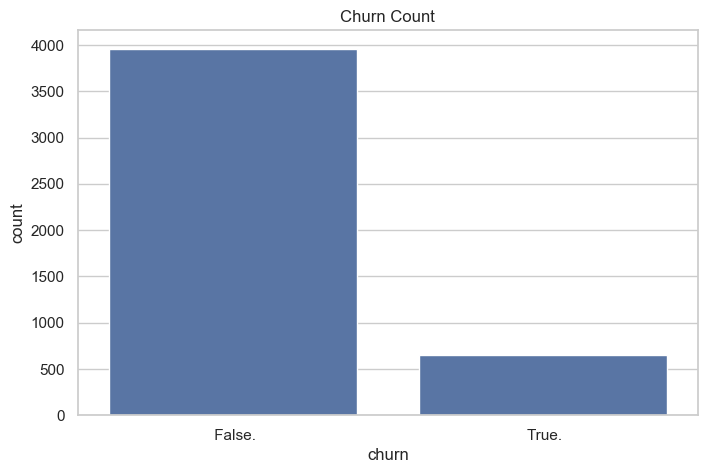

In [35]:
# Setting the style of the plot "whitegrid".
sns.set(style = "whitegrid")

# Setting the size of the figure to 8*5 inches.
plt.figure(figsize = (8, 5))

# Creating a countplot for the 'churn' column in the DataFrame 'data'.
sns.countplot(x = data["churn"])

# Setting the  title of the plot.
plt.title("Churn Count")

# Displaying the plot.
plt.show()

**Insights :**
>- If customers spend less money on volume-based services during the action month, there is a higher chance that they might leave.

>- Spending less on these services could make customers more likely to leave.

#### (8.1.1.2) Pie Chart for 'international_plan' column.

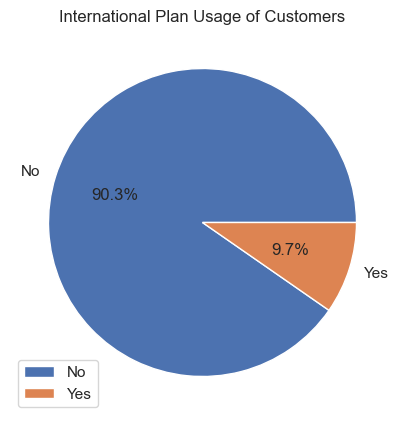

In [36]:
# Counting how many customers have or don't have an international plan.
international_plan_counts = data['international_plan'].value_counts()

# Setting up a pie chart with a specific size.
plt.figure(figsize = (5, 5))

# Labels for the two sections of the pie chart.
labels = ['No', 'Yes']

# Creating the pie chart with percentage labels.
plt.pie(international_plan_counts, labels = labels, autopct = '%1.1f%%')

# Adding a legend to show which label corresponds to each section
plt.legend(loc = 'lower left')

# Adding a title to the pie chart.
plt.title('International Plan Usage of Customers')

# Displaying the pie chart.
plt.show()

**Insights :**
>- The pie chart tells us how many customers use international plans and how many don't, showing how common these plans are.

>- Here, '90.3%' of customers don't use international plans whereas '9.7%' of customers use international plans. 

#### (8.1.1.3) Countplot for 'state' column.

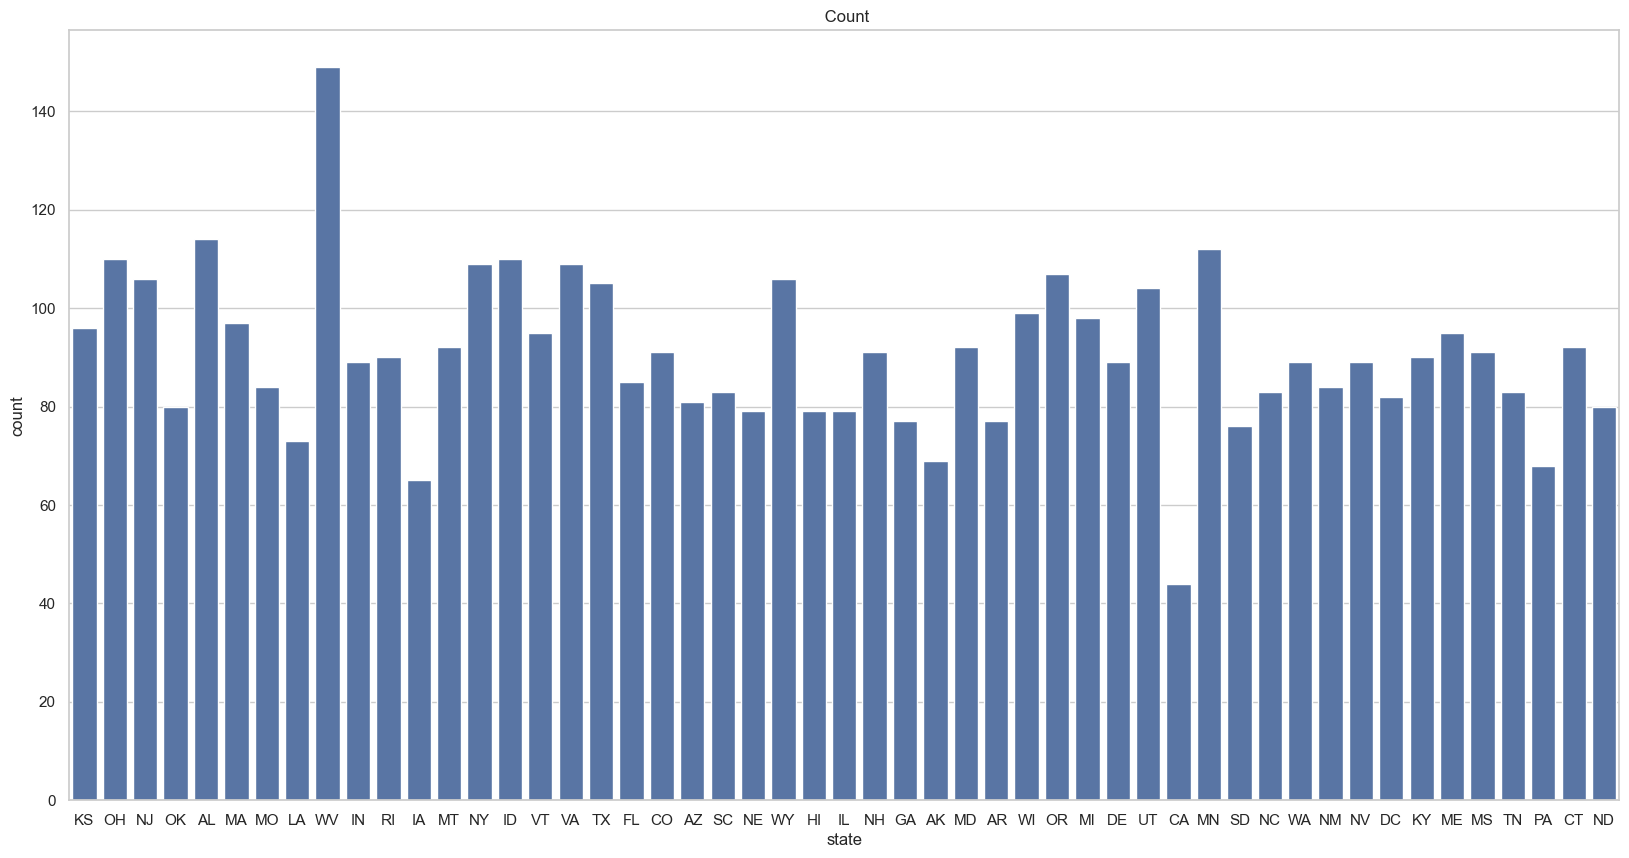

In [37]:
# Setting the size of the figure to 8*5 inches.
plt.figure(figsize = (20, 10))

# Creating a countplot for the 'churn' column in the DataFrame 'data'.
sns.countplot(x = data["state"])

# Setting the  title of the plot.
plt.title(" Count")

# Displaying the plot.
plt.show()

**Insights :**
>- This plot shows how many customers are in each state, making it easy to see which states have more cutomers.

#### (8.1.1.4) Countplot for 'custserv_calls' column.

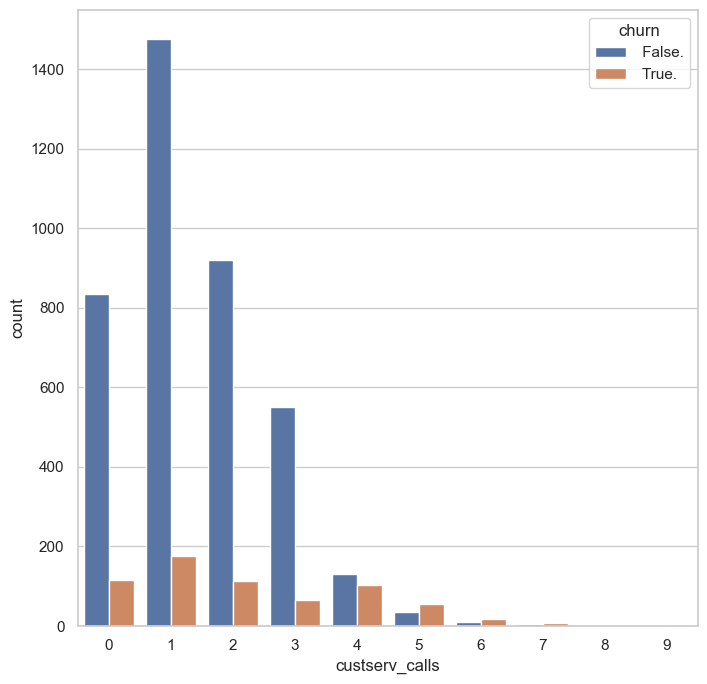

In [38]:
# Setting the size of the figure to 8*8 inches.
plt.figure(figsize = (8,8))

# Creating a count plot for the 'custserv_calls' column with 'churn' as hue in the DataFrame 'data'.
# Count plot shows the distribution of 'custserv_calls' values, and 'hue' colors by 'churn'. 
sns.countplot(x = "custserv_calls", hue = "churn", data = data)

# Displaying the plot.
plt.show()

**Insights :**
>- This chart helps us check if customers leaving is connected to how many times they call customer service.

>- We can easily see if there is a pattern in churn based on the number of servie calls.

#### (8.1.1.5) Pie chart for Voice Mail Plan.

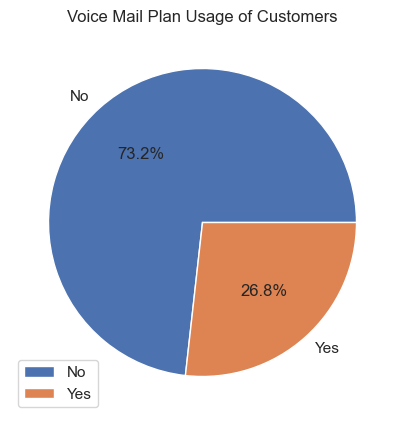

In [39]:
# Counting how many customers have or don't have an international plan.
vmail_plan_counts = data['vmail_plan'].value_counts()

# Setting up a pie chart with a specific size.
plt.figure(figsize = (5, 5))

# Labels for the two sections of the pie chart.
labels = ['No', 'Yes']

# Creating the pie chart with percentage labels.
plt.pie(vmail_plan_counts, labels = labels, autopct = '%1.1f%%')

# Adding a legend to show which label corresponds to each section
plt.legend(loc = 'lower left')

# Adding a title to the pie chart.
plt.title('Voice Mail Plan Usage of Customers')

# Displaying the pie chart.
plt.show()

**Insights :**
>- This pie chart shows if customers use voice mail plans or not, making it easy to see how many have these plans.

>- Here, '73.2%' of customers don't use voice mail plans whereas '26.8%' of customers use voice mail plans.

### (8.1.2) Histplot
>- A 'histplot' is a graphical representation of a histogram.

>- It is used to check ditribution of data.

In [40]:
# It shows us all the numerical columns from the database.

data.columns

Index(['state', 'account_length', 'area_code', 'phone', 'international_plan',
       'vmail_plan', 'vmail_message', 'day_mins', 'day_calls', 'day_charge',
       'eve_mins', 'eve_calls', 'eve_charge', 'night_mins', 'night_calls',
       'night_charge', 'international_mins', 'international_calls',
       'international_charge', 'custserv_calls', 'churn'],
      dtype='object')

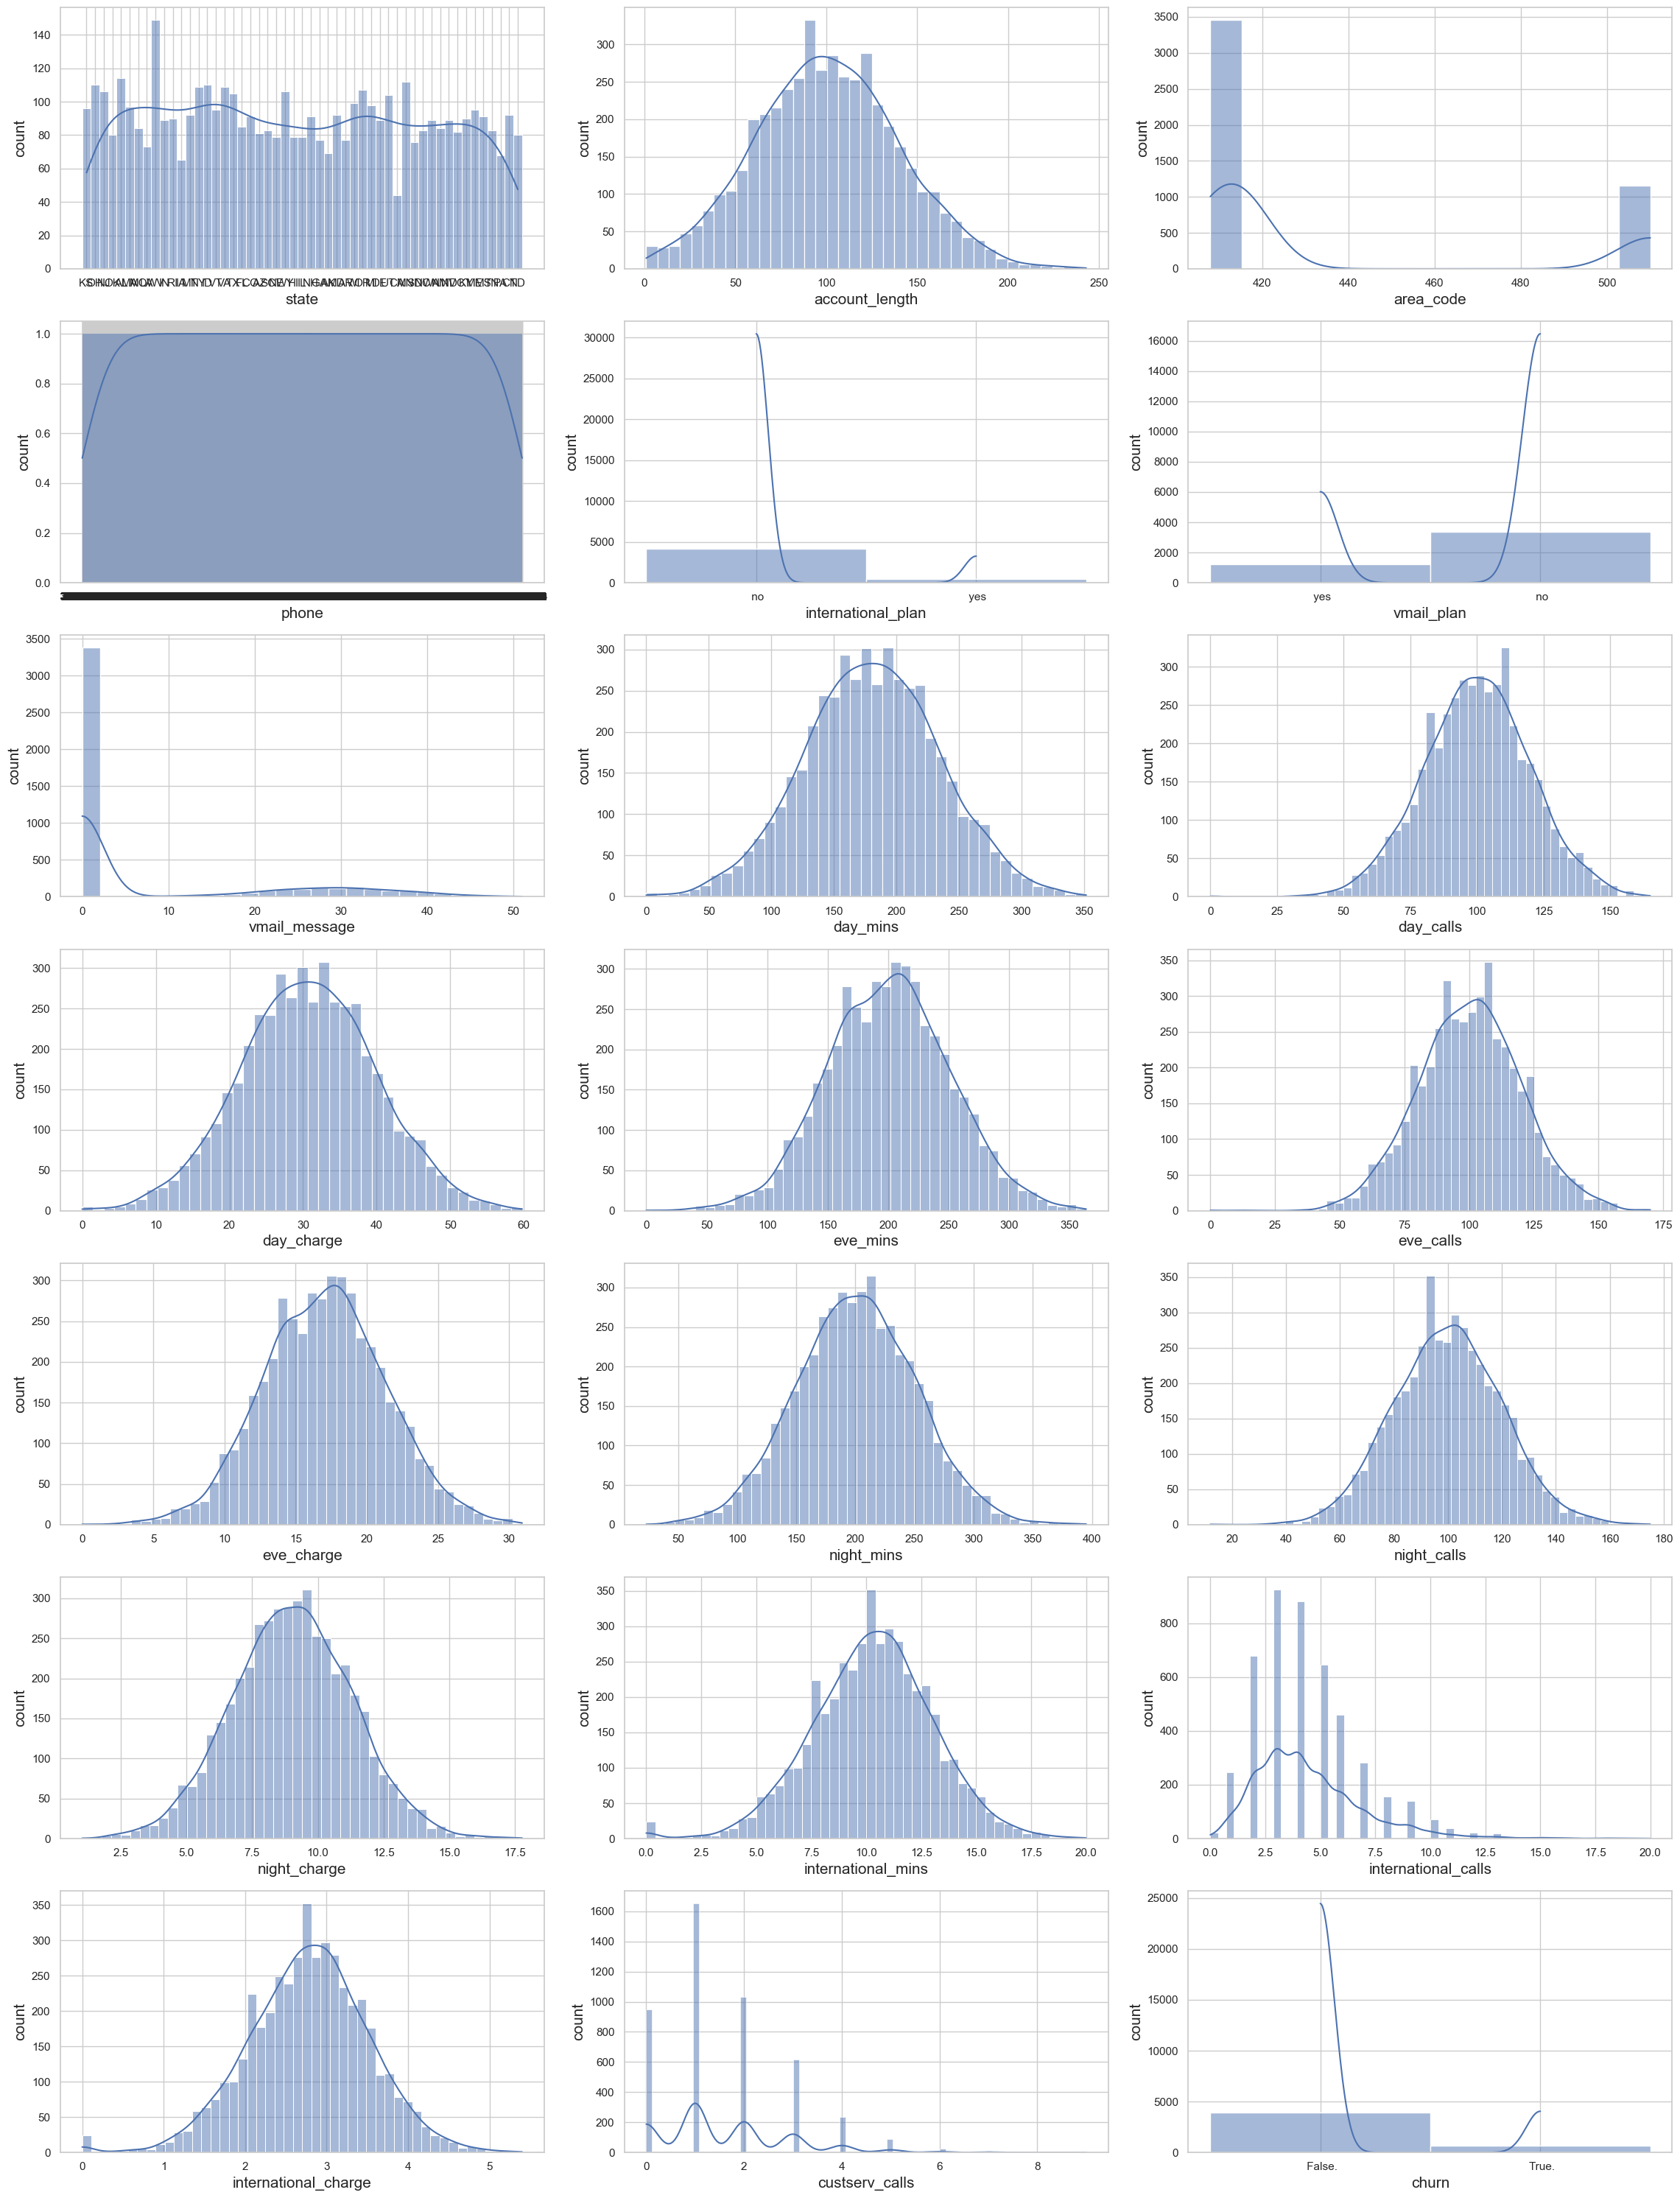

In [41]:
# It will create a new figure with a fixed size and background color.
plt.figure(figsize = (23,30), facecolor = 'white')

# Initializing a counter for subplot placement.
plotnumber = 1

# Looping through each num_col in data :
for column in data :

    # Limiting the number of subplots to 16.
    if plotnumber <= 21 :

        # Creating a subplot in a 4*3 grid.
        ax = plt.subplot(7,3, plotnumber)

        # Plotting a histogram with kernel density function.
        sns.histplot(x = data[column], kde = True)

        # Adding the label to the x and y axes and setting font size.
        plt.xlabel(column, fontsize = 15)
        plt.ylabel('count', fontsize = 15)

    # Incrementing the plot number for the next iteration.
    plotnumber = plotnumber + 1

# Adjusting the layout of the subplots for better spacing.
plt.tight_layout()

# It will display the plot.
plt.show()

**Insights :**
>- This code creates graphs (histogram with KDE) to show how the numberical data are spread in the dataset.

>- It helps us understand the patterns, shapes, and where the numerical data usually gather.

>- These values have almost zero skewness, indicating a normal distribution.

### (8.1.3) Using SweetViz

In [42]:
# We are installing the Sweetviz library using the pip package manager.

!pip install sweetviz

In [43]:
# It imports the Sweetviz library and assigns it the alias 'sv'.
import sweetviz as sv

# It uses Sweetviz to analyze the 'data' DataFrame and generates a report,
# which is stored in the variable 'my_report'.
my_report = sv.analyze(data)

# It saves the analysis repport in an HTML file named "my_report.html",
# and then save it.
my_report.show_html("my_report.html")

                                             |                                             | [  0%]   00:00 ->…

Report my_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Insights from Univariate Analysis :

**1. Customer Distribution by State :**
>- 3% of customers are from West Virginia (WV).
>- Most customers (60%) are from other states.
>- The remaining states represent 2% of customers each.


**2. Area Code Distribution :**
>- 50% of customers have the area code 415.
>- Area codes 408 and 510 are each held by 25% of customers.

    
**3. International Plan Subscription :**
>- 90% of customers have not subscribed to the International plan.
>- Only 10% of customers have opted for the International plan.


**4. Voice Mail Subscription :**
>- 27% of customers have subscribed to voicemail.
>- The remaining 73% have not subscribed to voicemail.
>- Among the 73%, no voicemail messages have been recorded.


**5. Usage Patterns :**
>- Less than 1% of customers have the highest day minutes (154 minutes).
>- The highest number of calls made in a day is 102.
>- The highest charge in a day is $26.18.
>- The highest evening minutes spent is 169.9 minutes.

**6. Evening Calls and Charges :**
>- 2% of customers (111) do evening calls, the highest among all.
>- The charge of $14.25 is paid most frequently by customers.


**7. Night Usage Patterns :**
>- The highest night minutes spent is 194.3 minutes.
>- The highest number of night calls made is 105 by 115 customers.
>- Less than 1% of customers have night charges.


**8. International Calls and Charges :**
>- The most commonly occurring international minutes is 9.8 minutes.
>- 20% of customers (925) have made 3 international calls.
>- The highest international charge is $2.65.

    
**9. Survey Calls :**
>- 365 customers had at least 1 survey call.

    
**10. Churn Rate :**
>- 86% of customers will not churn or leave.
>- The remaining 14% are likely to churn.

## (8.2) Bivariate Analysis
>- Analysing two varibles/columns/feature.

### (8.2.1) Count plot for 'international_plan' column with 'churn' column.

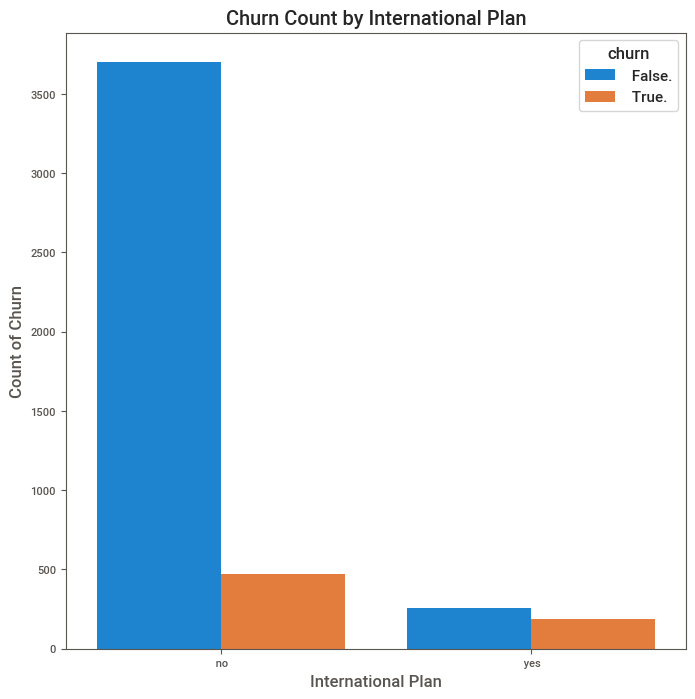

In [44]:
# Here, We are setting the figure size.
plt.figure(figsize = (8,8))

# Create a count plot for 'international_plan' with 'churn' as hue in the DataFrame 'churn_data'
sns.countplot(x = 'international_plan', data = data, hue = 'churn')

# Set labels for the x and y axes
plt.xlabel('International Plan')
plt.ylabel('Count of Churn')

# Set the title of the plot
plt.title('Churn Count by International Plan')

# Display the plot
plt.show()

**Insights :**
>- This chart helps us see if having an international plan affects how many customers leave.

>- It shows the number of customers who stayed and left for both those with and without international plans.

### (8.2.2) Count plot for the 'state' column with 'churn' column.

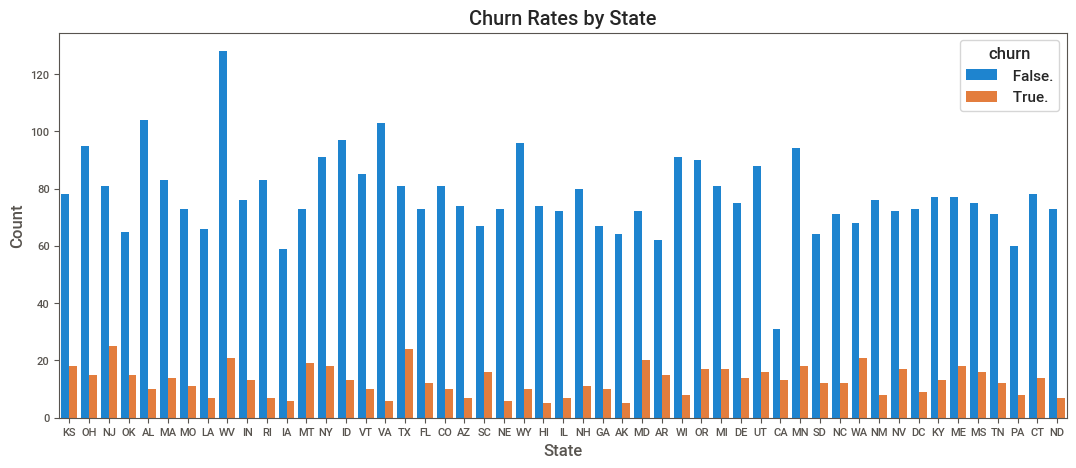

In [45]:
# Setting the size of the figure to 13*5 inches.
plt.figure(figsize = (13, 5))

# creating a count plot for the 'state' column, with 'churn' as hue in the DataFrame 'data'. 
sns.countplot(x = "state", data = data, hue = "churn")

# Setting the title of the plot.
plt.title("Churn Rates by State")

# Adding labels to the x and y axes.
plt.xlabel("State")
plt.ylabel("Count")

# Displaying the plot.
plt.show()

**Insights :**
>- This chart helps us see if more people are leaving in some states.

>- It shows if customer staying is different in each state.

### (8.2.3) Count plot for 'vmail_plan' column with 'churn' column.

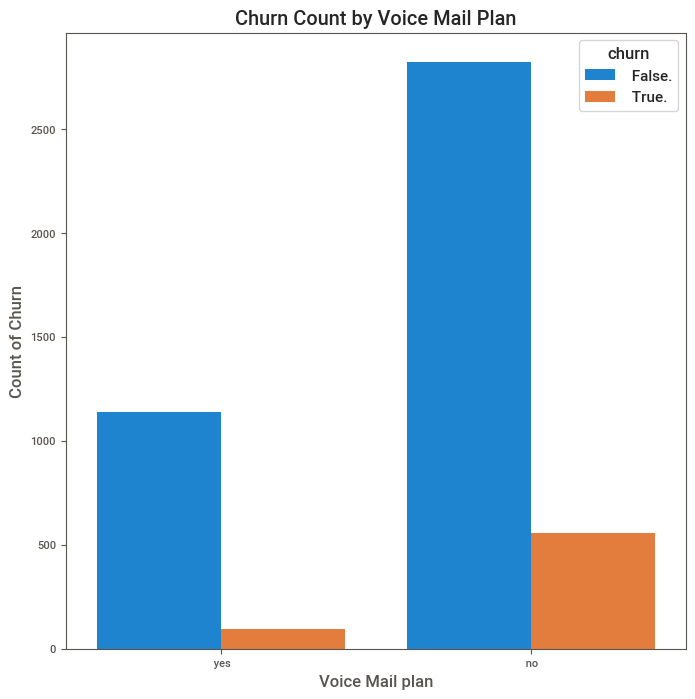

In [46]:
# Here, We are setting the figure size.
plt.figure(figsize = (8,8))

# Create a count plot for 'vmail_plan' with 'churn' as hue in the DataFrame 'churn_data'
sns.countplot(x='vmail_plan', data = data, hue='churn')

# Set labels for the x and y axes
plt.xlabel('Voice Mail plan')
plt.ylabel('Count of Churn')

# Set the title of the plot
plt.title('Churn Count by Voice Mail Plan')

# Display the plot
plt.show()

**Insights :**
>- This chart helps us check if using a voice mail plan makes customers more likely to leave.

>- It shows how many stayed or left for both groups.

### (8.2.4) Scatter plot for 'calls_columns' and 'charge_columns'

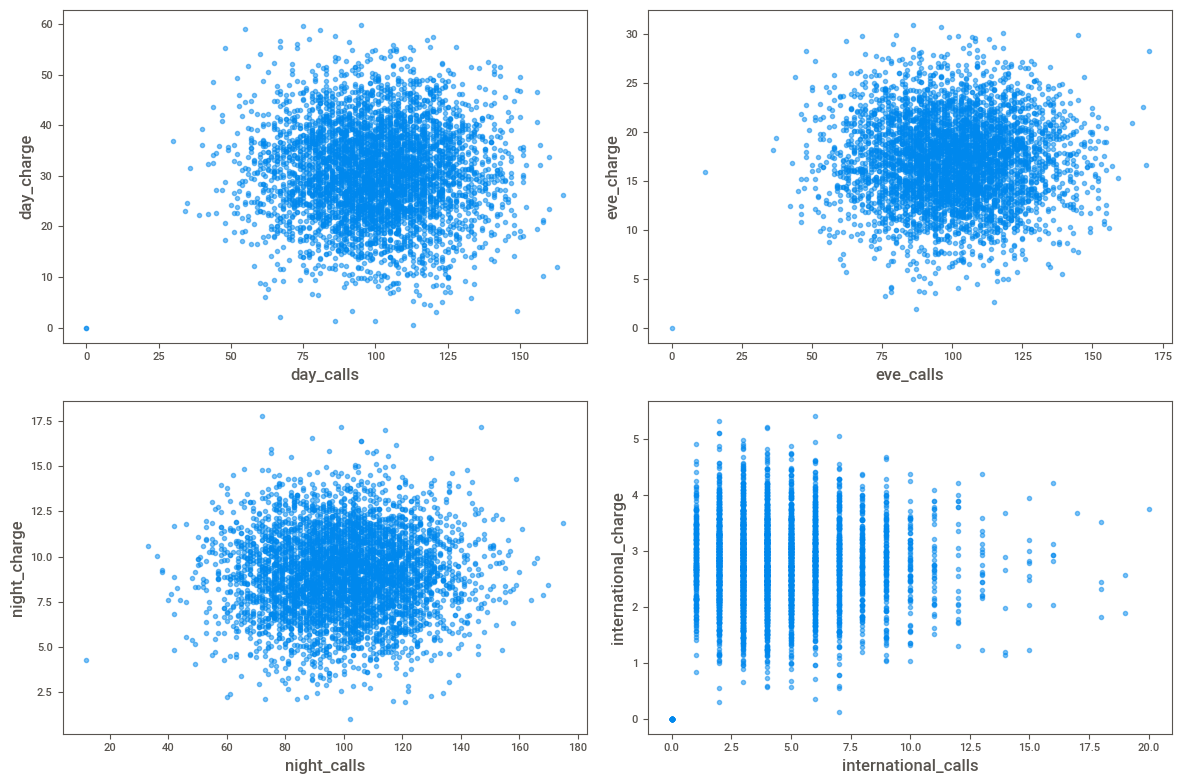

In [47]:
# Here, We are defining lists of call-related and charge-related columns.
calls_columns = ['day_calls', 'eve_calls', 'night_calls', 'international_calls']
charge_columns = ['day_charge', 'eve_charge', 'night_charge', 'international_charge']

# Setting the figure size of the entire figure to 12*8 inches.
plt.figure(figsize = (12, 8))

# Creating subplots for each pair of call and charge columns.
for i in range(len(calls_columns)) :

    # Creating a subplot in a 2*2 grid.
    plt.subplot(2, 2, i+1)

    # Creating a scatter plot for the i-th pair of call and charge columns.
    plt.scatter(data[calls_columns[i]], data[charge_columns[i]], alpha = 0.5)

    # Setting x-axis label with the name of the call column.
    plt.xlabel(calls_columns[i])

    # Setting y-axis label with the name of the charge column.
    plt.ylabel(charge_columns[i])

# Adjusting layout to prevent overlapping of subplots.
plt.tight_layout()

# Displaying the plot.
plt.show()

**Insights :**
>- This code creates scatter plots to visualize the relationship between call-related columns and their corresponding charge-related columns.

>- This helps us quickly check if there are any patterns or connections between these things.

### (8.2.5) Scatter plot for 'mins_columns' and 'charge_column'

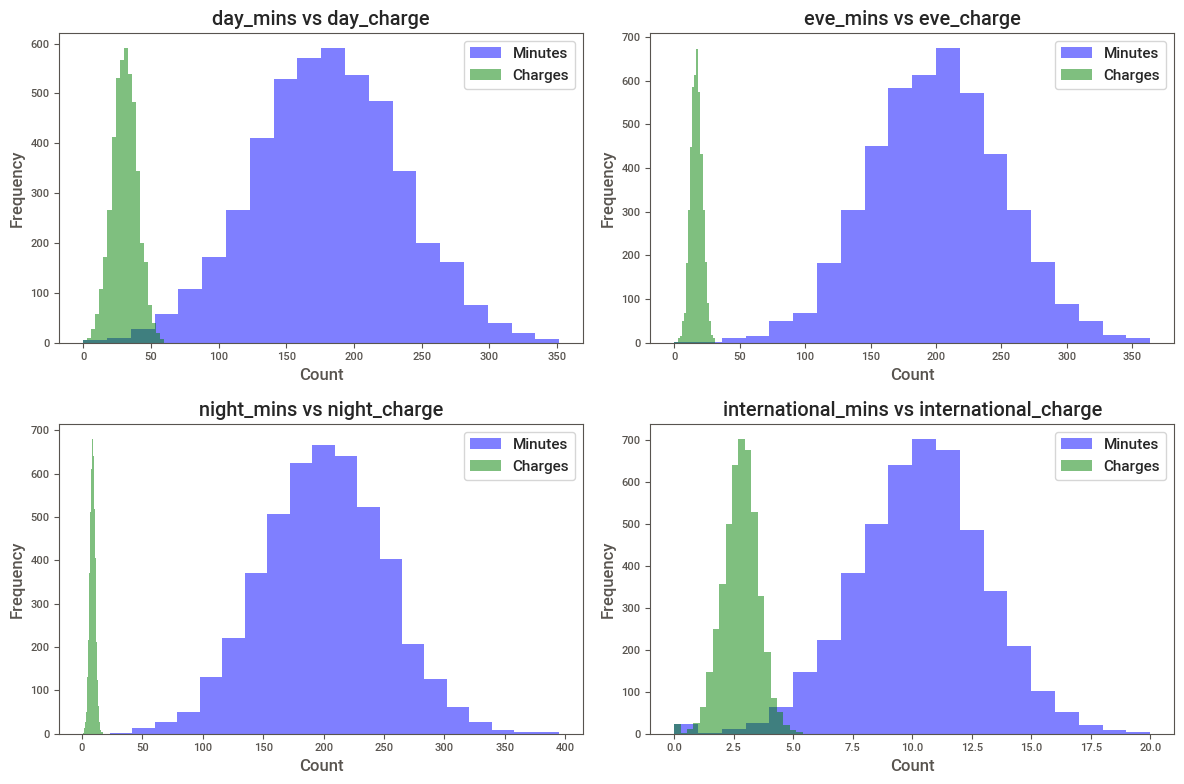

In [48]:
# Setting the size of the entire figure to 12*8 inches.
plt.figure(figsize = (12,8))

# Defining lists of minutes-related and charge-related columns.
mins_columns = ['day_mins', 'eve_mins', 'night_mins', 'international_mins']
charge_columns = ['day_charge', 'eve_charge', 'night_charge', 'international_charge']


# Creating subplots for each pair of minutes and charge columns.
for i in range(len(mins_columns)) :

     # Creating a subplot in a 2*2 grid.
     plt.subplot(2, 2, i+1)

     # Creating histogram for minutes and charges, using 20 bins for better distribution visualization.
     plt.hist(data[mins_columns[i]], bins = 20, alpha = 0.5, label = 'Minutes', color = 'blue')
     plt.hist(data[charge_columns[i]], bins = 20, alpha = 0.5, label = 'Charges', color = 'green')

     # set the subplot title with the names of the minutes and charge columns.
     plt.title(f'{mins_columns[i]} vs {charge_columns[i]}')

     # Adding labels to the x amd y axes.
     plt.xlabel('Count')
     plt.ylabel('Frequency')

     # Adding a legend to differentiate between minutes and charges.
     plt.legend()

# Adjusting layout to prevent overlapping of subplots.
plt.tight_layout()

# Displaying the plot.
plt.show()

**Insights :**
>- This code creates a visual representation by comparing how many minutes and charges there are for different times.

>- It helps us to see and compare how calls are related to the charges.

### (8.2.6) Calculating Average cost per minute 

In [49]:
# Calculating the cost per minute for day use.
cost_per_minute_day = data['day_charge'] / data['day_mins']

# Calculating the cost per minute for evening usage.
cost_per_minute_evening = data['eve_charge'] / data['eve_mins']

# Calculating the cost per minute for night usage.
cost_per_minute_night = data['night_charge'] / data['night_mins']

# Calculating the cost per minute for international calls.
cost_per_minute_international = data['international_charge'] / data['international_mins']


# Calculating the average cost per minute for each usage type.
average_cost_day = cost_per_minute_day.mean()
average_cost_evening = cost_per_minute_evening.mean()
average_cost_night = cost_per_minute_night.mean()
average_cost_international = cost_per_minute_international.mean()


# Printing the results.
print(f'Average Cost per Minute (Day) : {average_cost_day:.2f}')
print(f'Average Cost per Minute (Evening) : {average_cost_evening:.2f}')
print(f'Average Cost per Minute (Night) : {average_cost_night:.2f}')
print(f'Average Cost per Minute (International) : {average_cost_international:.2f}')

Average Cost per Minute (Day) : 0.17
Average Cost per Minute (Evening) : 0.09
Average Cost per Minute (Night) : 0.05
Average Cost per Minute (International) : 0.27


**Insights :**
>- We can analyse from this situation that these values should not be mixed because they are important for predicting who might leave.

## (8.3) Multivariate Analysis
>- Analysing multiple variables.

>- In Multivariate, We only do pairplot and don't write analysis.

In [50]:
# We can double click on graph to zoom it and see clearly.
# It will give all the pairplot except target column.


# Here, We are setting the figure size.
# plt.figure(figsize = (12, 8))

# # Visualizing dataset pattern with Seaborn pairplot.
# # 'hue' : It colors the plot by the 'churn' column.
# # 'daig_kind' : It shows kernal density estimates on diagonals.
# sns.pairplot(data, hue = 'churn', diag_kind = 'kde')

# # Displaying the plot.
# plt.show()

**Insights :**
>- If there is more orange(TRUE), it suggests a higher chance of leaving.

>- It shows there is more usage and spending happening.

# (9) DATA PREPROCESSING :

## (9.1) Checking for missing (null) values.

In [51]:
# Checking and summing up the missing values in 'data' DataFrame.

# Displaying the count of missing value for each column.
data.isnull().sum()

state                   0
account_length          0
area_code               0
phone                   0
international_plan      0
vmail_plan              0
vmail_message           0
day_mins                0
day_calls               0
day_charge              0
eve_mins                0
eve_calls               0
eve_charge              0
night_mins              0
night_calls             0
night_charge            0
international_mins      0
international_calls     0
international_charge    0
custserv_calls          0
churn                   0
dtype: int64

**Insights :**
>- There are no missing values.

### If we have null/missing value then we will handle it :
* If Numerical value is missing, then we will replace it with mean (When data is normal) or median (When data is not normal or skewed).
* If Categorical value is missing, then we will replace it with mode.

## (9.2) Checking for duplicates

>- Duplicates are repititive (which is repeated multiple times) records.

>- If data has duplicate values, then we will drop them.

In [52]:
# Checking and counting duplicated rows in 'data' DataFrame.

# Displaying the count of duplicated rows in the DataFrame.
data.duplicated().sum()

0

**Insights :**
>- There are no duplicate values in this dataset.

## (9.3) Converting Categorical to Numerical

In [53]:
# Importing the LabelEncoder class from the sklearn.preprocessing module.
from sklearn.preprocessing import LabelEncoder

# Creating an instance of the LabelEncoder class.
lb = LabelEncoder()

In [54]:
# List of columns to be encoded.
columns_to_encode = ['churn', 'international_plan', 'vmail_plan', 'state']

# Using a for loop to iterate over each column.
for column in columns_to_encode :

    # Encoding the current column in the 'data' DataFrame using LabelEncoder.
    data[column] = lb.fit_transform(data[column])

In [55]:
# Displaying the details of 'data'  DataFrame.

data

,state,account_length,area_code,phone,international_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,eve_calls,eve_charge,night_mins,night_calls,night_charge,international_mins,international_calls,international_charge,custserv_calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,510,345-7512,0,1,25,144.0,81,24.48,...,112,15.91,158.6,122,7.14,8.5,6,2.30,3,0
4613,32,177,408,343-6820,0,1,29,189.0,91,32.13,...,96,25.76,163.6,116,7.36,15.7,1,4.24,3,0
4614,46,67,408,338-4794,0,1,33,127.5,126,21.68,...,129,25.17,200.9,91,9.04,13.0,3,3.51,1,0
4615,22,98,415,355-8388,0,1,23,168.9,98,28.71,...,117,19.24,165.5,96,7.45,14.3,3,3.86,0,0


In [56]:
# Extracting unique values of 'area_code' from the 'churn_data' DataFrame
unique_area_code = data['area_code'].unique()

# Sorting the unique area codes in ascending order
sorted_area_code = sorted(unique_area_code)

# Printing the sorted area codes
print(sorted_area_code)

[408, 415, 510]


**Insights :**
>- There are only three available area codes: 408, 415 and 510.

>- Therefore, there are two possible ways to divide the segments - based on area code or by grouping based on account length every 28 or 30 days.

# (9.4) Check for Outliers

### (9.4.1) Dropping irrelevant column

In [57]:
# Dropping specified columns from 'data' DataFrame.

data = data.drop(['phone', 'area_code', 'day_calls', 'eve_calls', 
                  'night_calls', 'international_calls'], axis = 1)

In [58]:
# Displaying details of 'data' DataFrame.

data

,state,account_length,international_plan,vmail_plan,vmail_message,day_mins,day_charge,eve_mins,eve_charge,night_mins,night_charge,international_mins,international_charge,custserv_calls,churn
0,16,128,0,1,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1,0
1,35,107,0,1,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1,0
2,31,137,0,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,0
3,35,84,1,0,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2,0
4,36,75,1,0,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,0,1,25,144.0,24.48,187.2,15.91,158.6,7.14,8.5,2.30,3,0
4613,32,177,0,1,29,189.0,32.13,303.1,25.76,163.6,7.36,15.7,4.24,3,0
4614,46,67,0,1,33,127.5,21.68,296.1,25.17,200.9,9.04,13.0,3.51,1,0
4615,22,98,0,1,23,168.9,28.71,226.3,19.24,165.5,7.45,14.3,3.86,0,0


### (9.4.2) Checking Outliers using BoxPlot

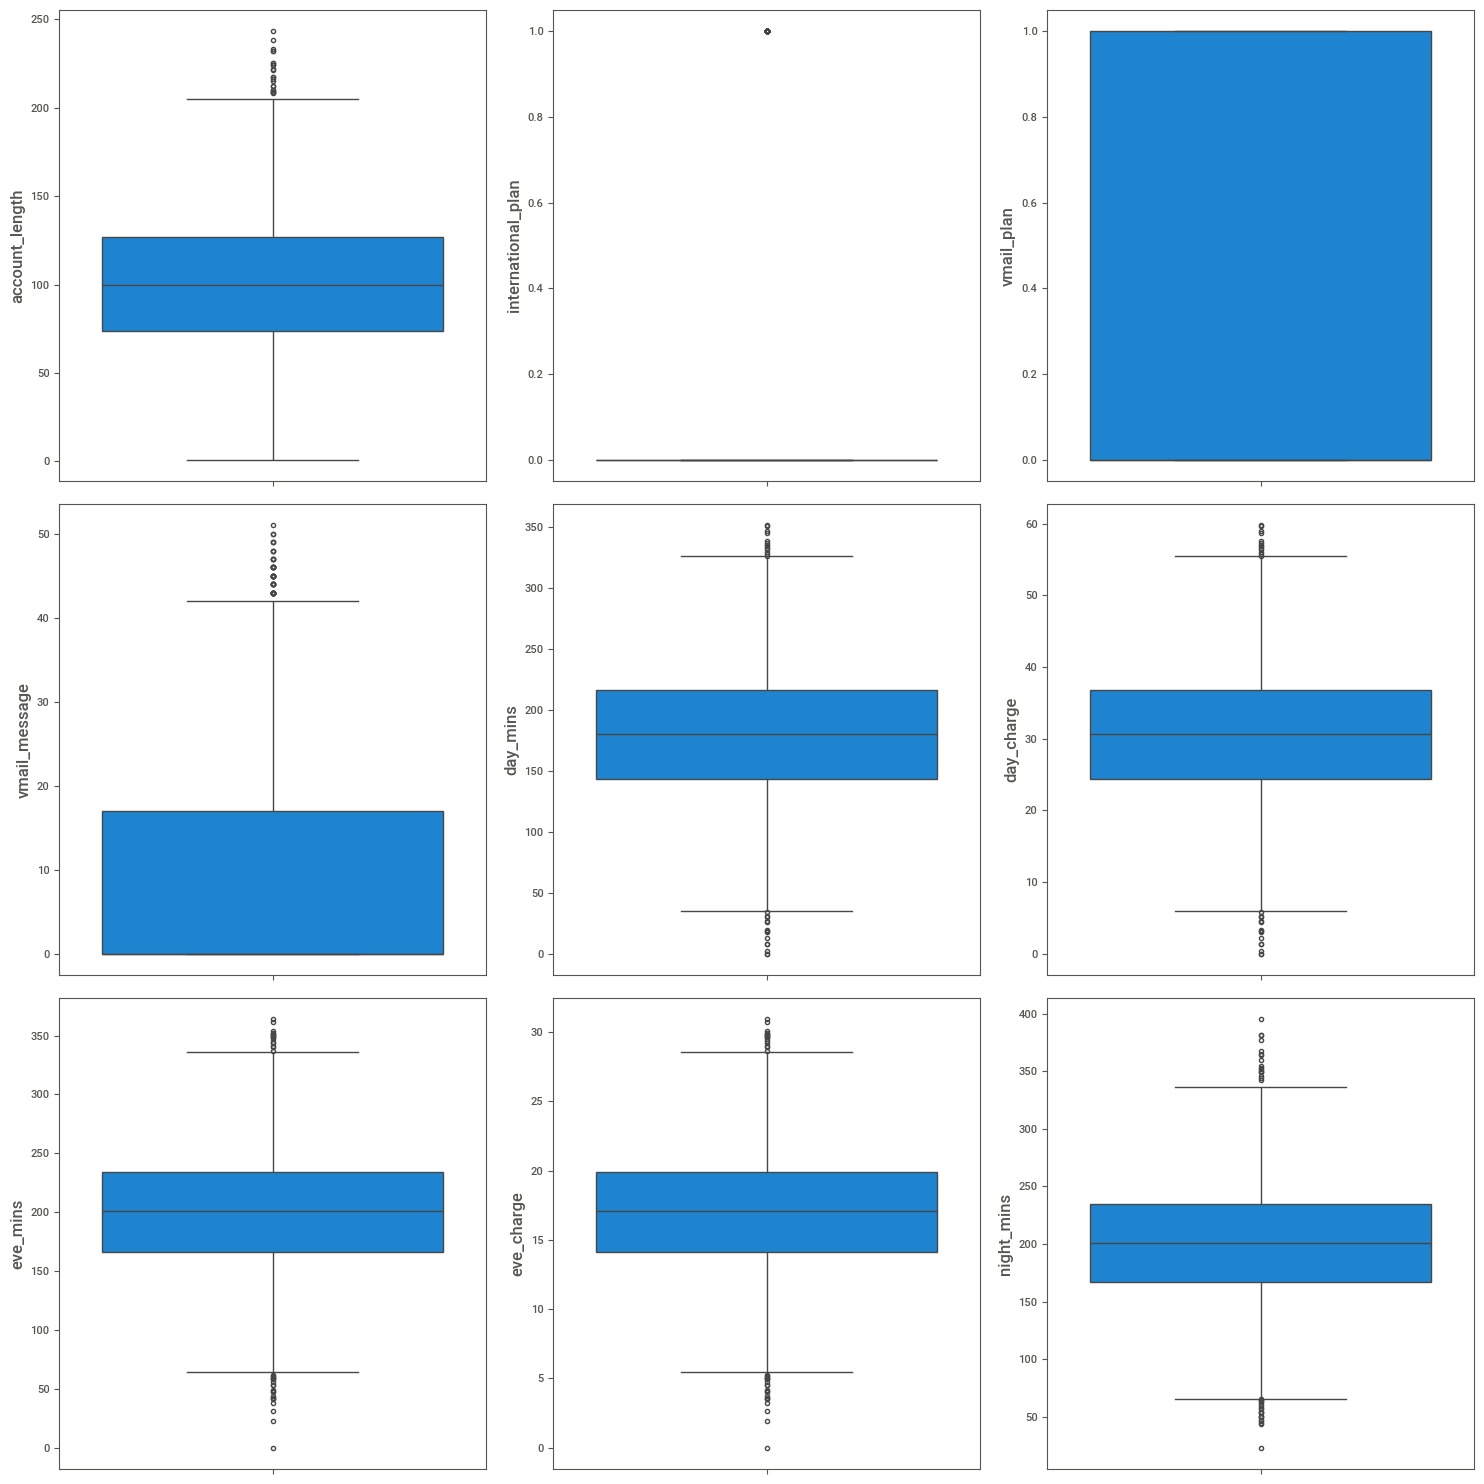

In [59]:
# Creating a figure with a specified size and facecolor.
plt.figure(figsize = (15, 15), facecolor = "white")

# Initializing plot number.
plotnumber = 1

# Looping through each column in the dataset.
for column in data.drop(["state", "churn"], axis = 1) :

    # Plotting only for the first 9 numerical or continuous columns.
    if plotnumber <= 9 :

        # Creating subplots in a 3*3 grid.
        ax = plt.subplot(3, 3, plotnumber)

        # Creating a boxplot for the current numerical column.
        sns.boxplot(data[column])

    # Increasing plot number for the next iteration.
    plotnumber = plotnumber + 1

# Adjusting the layout for better visualization.
plt.tight_layout()

# Displaying the plot.
plt.show()

**Insights:**
>- Outliers in data are not very unusual.

>- This suggests that we may not need a detailed analysis.

>- Outliers are in a less important range.

>- We are just focusing on main trends, no need to study every outlier.

>- This way, Our analysis can be easier and simpler.

# (10) SCALING DATA (NORMALIZATION OR STANDARD) :
>- Scaling is always applied on continuous columns

## (10.1) StandardScaler

In [60]:
# Importing the StandardScaler from scikit-learn.
from sklearn.preprocessing import StandardScaler

# Creating an instance of StandardScaler.
std = StandardScaler()

In [61]:
# Here, We are droppong the 'churn' column from the features and standardizing the remaining data.
# 'fit_transform' calculates mean and standard deviation, then scales the data.

scaled_data = std.fit_transform(data.drop('churn', axis = 1))

In [62]:
# The 'scaled_data' contains the standardized features obtained by using StandardScaler.

scaled_data

array([[-0.67900123,  0.69090094, -0.32699969, ..., -0.10130125,
        -0.10200542, -0.43388538],
       [ 0.60575838,  0.16050289, -0.32699969, ...,  1.24070665,
         1.24148062, -0.43388538],
       [ 0.33528267,  0.91821439, -0.32699969, ...,  0.69664939,
         0.69065134, -1.19906826],
       ...,
       [ 1.34956657, -0.84977911, -0.32699969, ...,  0.98681327,
         0.98621827, -0.43388538],
       [-0.27328767, -0.06681056, -0.32699969, ...,  1.45832956,
         1.45643839, -1.19906826],
       [-0.74662015,  0.99398554, -0.32699969, ...,  0.66037891,
         0.66378162,  0.3312975 ]])

In [63]:
# We are assigning column names to the DataFrame using the original feature names.

scaled_df = pd.DataFrame(scaled_data, columns = data.drop('churn', axis = 1).columns)

In [64]:
# Displaying the combined DataFrame.

scaled_df

,state,account_length,international_plan,vmail_plan,vmail_message,day_mins,day_charge,eve_mins,eve_charge,night_mins,night_charge,international_mins,international_charge,custserv_calls
0,-0.679001,0.690901,-0.327000,1.653916,1.261885,1.568293,1.568569,-0.059921,-0.059742,0.872135,0.871418,-0.101301,-0.102005,-0.433885
1,0.605758,0.160503,-0.327000,1.653916,1.335463,-0.349166,-0.349447,-0.097506,-0.096978,1.064069,1.064889,1.240707,1.241481,-0.433885
2,0.335283,0.918214,-0.327000,-0.604626,-0.577587,1.166275,1.166439,-1.567294,-1.567818,-0.752381,-0.751101,0.696649,0.690651,-1.199068
3,0.605758,-0.420409,3.058107,-0.604626,-0.577587,2.203741,2.203911,-2.740354,-2.740765,-0.073686,-0.073952,-1.334498,-1.338013,0.331298
4,0.673377,-0.647723,3.058107,-0.604626,-0.577587,-0.254682,-0.254636,-1.031207,-1.030217,-0.271556,-0.271820,-0.065031,-0.061701,1.096480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.538139,-1.102350,-0.327000,1.653916,1.261885,-0.675226,-0.675291,-0.261695,-0.262215,-0.831529,-0.830248,-0.645359,-0.639400,1.096480
4613,0.402902,1.928496,-0.327000,1.653916,1.556200,0.158452,0.158391,2.031015,2.030153,-0.732594,-0.733513,1.966116,1.966963,1.096480
4614,1.349567,-0.849779,-0.327000,1.653916,1.850515,-0.980908,-0.980430,1.892543,1.892843,0.005463,0.005195,0.986813,0.986218,-0.433885
4615,-0.273288,-0.066811,-0.327000,1.653916,1.114727,-0.213925,-0.214314,0.511773,0.512768,-0.694999,-0.693939,1.458330,1.456438,-1.199068


## (10.2) Creating a copy of 'data' DataFrame

In [65]:
# It will create a copy of the 'data' DataFrame and assign it to 'data1'.

data1 = data.copy()

In [66]:
# It contains all the data of 'data' DataFrame.

data1

,state,account_length,international_plan,vmail_plan,vmail_message,day_mins,day_charge,eve_mins,eve_charge,night_mins,night_charge,international_mins,international_charge,custserv_calls,churn
0,16,128,0,1,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1,0
1,35,107,0,1,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1,0
2,31,137,0,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,0
3,35,84,1,0,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2,0
4,36,75,1,0,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,34,57,0,1,25,144.0,24.48,187.2,15.91,158.6,7.14,8.5,2.30,3,0
4613,32,177,0,1,29,189.0,32.13,303.1,25.76,163.6,7.36,15.7,4.24,3,0
4614,46,67,0,1,33,127.5,21.68,296.1,25.17,200.9,9.04,13.0,3.51,1,0
4615,22,98,0,1,23,168.9,28.71,226.3,19.24,165.5,7.45,14.3,3.86,0,0


# (11) FEATURE ENGINEERING :

## (11.1) Finding correlation among data.
>- If it's Regression, We check correlation between input and output variables.

>- If it's classification, We check correlation among the input variables.

In [67]:
# Check for multicollinearity.

data1.corr()

,state,account_length,international_plan,vmail_plan,vmail_message,day_mins,day_charge,eve_mins,eve_charge,night_mins,night_charge,international_mins,international_charge,custserv_calls,churn
state,1.000000,0.008638,0.009789,-0.033323,-0.028491,0.009172,0.009173,0.002927,0.002920,0.014747,0.014735,-0.017423,-0.017464,-0.016943,0.010979
account_length,0.008638,1.000000,0.013948,-0.004602,-0.012983,0.002002,0.001999,-0.006778,-0.006775,-0.002077,-0.002095,0.003483,0.003501,0.002620,0.018046
international_plan,0.009789,0.013948,1.000000,0.009278,0.011596,0.028220,0.028223,0.023740,0.023740,-0.025951,-0.025959,0.036973,0.036955,-0.012846,0.257524
vmail_plan,-0.033323,-0.004602,0.009278,1.000000,0.955280,0.004444,0.004441,0.021775,0.021779,0.006431,0.006426,0.005872,0.005912,-0.014544,-0.110149
vmail_message,-0.028491,-0.012983,0.011596,0.955280,1.000000,0.009028,0.009025,0.017872,0.017878,0.004672,0.004665,0.005167,0.005202,-0.006951,-0.096884
day_mins,0.009172,0.002002,0.028220,0.004444,0.009028,1.000000,1.000000,-0.010260,-0.010268,0.009604,0.009591,-0.012314,-0.012261,-0.008149,0.202439
day_charge,0.009173,0.001999,0.028223,0.004441,0.009025,1.000000,1.000000,-0.010255,-0.010262,0.009606,0.009593,-0.012315,-0.012262,-0.008155,0.202434
eve_mins,0.002927,-0.006778,0.023740,0.021775,0.017872,-0.010260,-0.010255,1.000000,1.000000,-0.018830,-0.018837,0.000165,0.000172,-0.015598,0.087042
eve_charge,0.002920,-0.006775,0.023740,0.021779,0.017878,-0.010268,-0.010262,1.000000,1.000000,-0.018839,-0.018846,0.000163,0.000170,-0.015611,0.087036
night_mins,0.014747,-0.002077,-0.025951,0.006431,0.004672,0.009604,0.009606,-0.018830,-0.018839,1.000000,0.999999,-0.004549,-0.004500,-0.013871,0.043262


## (11.2) Plotting Heatmap

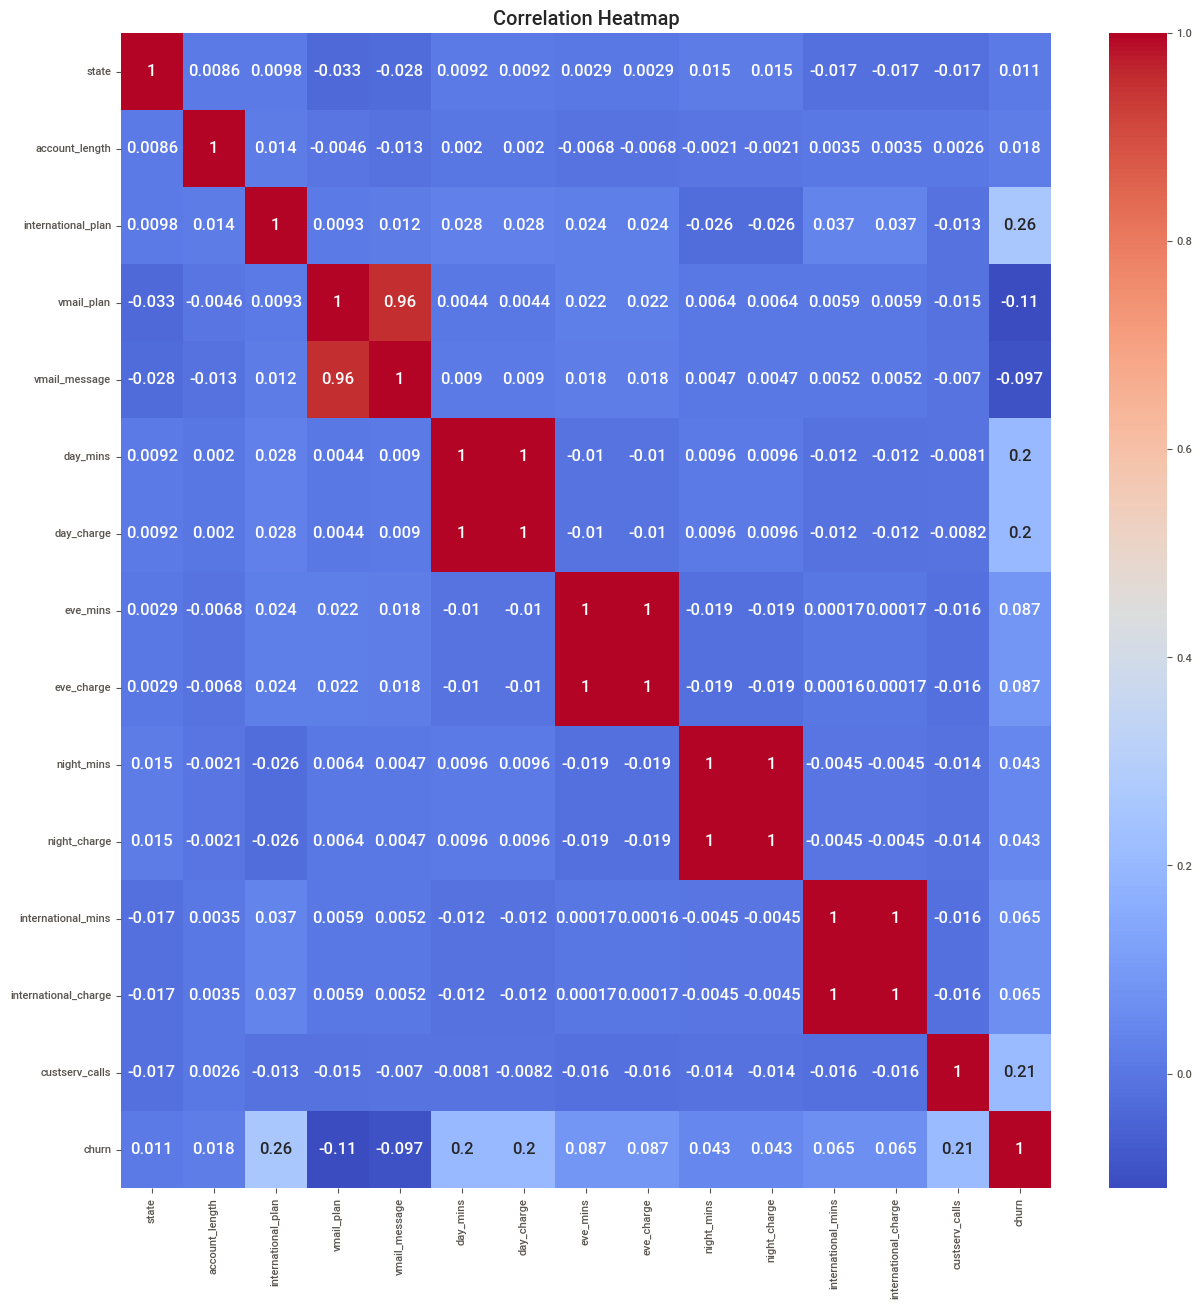

In [68]:
# it will set the figure size of the heatmpa.
plt.figure(figsize = (15, 15))

# It will create large heatmap to visualize the correlation matrix of 'data1'.
# 'annot = True' : It displays the correlation values in each cell.
# 'cmap = "coolwarm"' : "coolwarm" color map is used for better visaulization.
sns.heatmap(data1.corr(), annot = True, cmap = "coolwarm")

# It will set the title of the heatmap.
plt.title("Correlation Heatmap")

# It will display the plot.
plt.show()

**Insights :**
>- We noticed that 'vmail_message', 'day_charge', 'eve_charge', 'night_charge' and 'international_charge' are strongly connected to other fields.

>- We will check them closely to avoid having too much similar information.

## (11.3) Distribution on the basis of messages and charges

### (11.3.1) Kernal Density plot for 'vmail_message'.

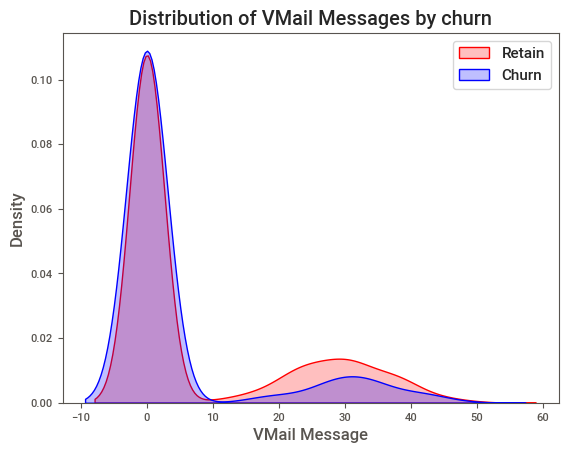

In [69]:
# Creating kernel density plots for "VMail Message" bamsed on "Churn" status.
ax = sns.kdeplot(data[data.churn == False]['vmail_message'], color = "Red", fill = True)
ax = sns.kdeplot(data[data.churn == True]['vmail_message'], color = "Blue", fill = True)

# Adding legend to the upper right corner, labeling the red curve as "Retain" 
# and the blue curve as "Churn"
ax.legend(["Retain", "Churn"], loc = "upper right")

# Adding labels to the x and y axes..
ax.set_xlabel("VMail Message")
ax.set_ylabel("Density")

# Adding title to the plot.
ax.set_title("Distribution of VMail Messages by churn")

# Displaying the plot.
plt.show()

### (11.3.2) Kernal Density plots for 'day_charge'.

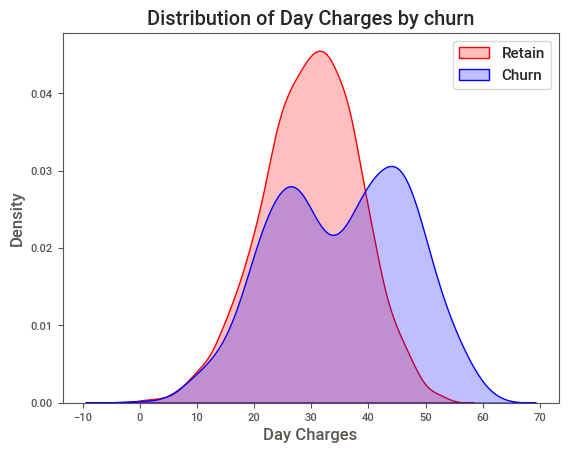

In [70]:
# Creating kernel density plots for "VMail Message" bamsed on "Churn" status.
ax = sns.kdeplot(data[data.churn == False]['day_charge'], color = "Red", fill = True)
ax = sns.kdeplot(data[data.churn == True]['day_charge'], color = "Blue", fill = True)

# Adding legend to the upper right corner, labeling the red curve as "Retain" 
# and the blue curve as "Churn"
ax.legend(["Retain", "Churn"], loc = "upper right")

# Adding labels to the x and y axes..
ax.set_xlabel("Day Charges")
ax.set_ylabel("Density")

# Adding title to the plot.
ax.set_title("Distribution of Day Charges by churn")

# Displaying the plot.
plt.show()

### (11.3.3) Kernal Density plot for 'eve_charge'.

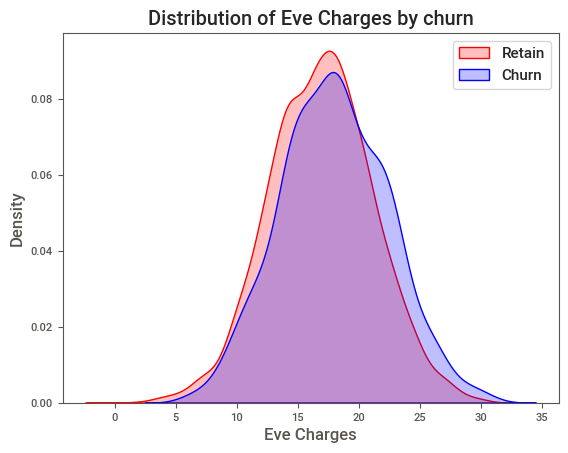

In [71]:
# Creating kernel density plots for "VMail Message" bamsed on "Churn" status.
ax = sns.kdeplot(data[data.churn == False]['eve_charge'], color = "Red", fill = True)
ax = sns.kdeplot(data[data.churn == True]['eve_charge'], color = "Blue", fill = True)

# Adding legend to the upper right corner, labeling the red curve as "Retain" 
# and the blue curve as "Churn"
ax.legend(["Retain", "Churn"], loc = "upper right")

# Adding labels to the x and y axes..
ax.set_xlabel("Eve Charges")
ax.set_ylabel("Density")

# Adding title to the plot.
ax.set_title("Distribution of Eve Charges by churn")

# Displaying the plot.
plt.show()

### (11.3.4) Kernal Density plot for 'night_charge'.

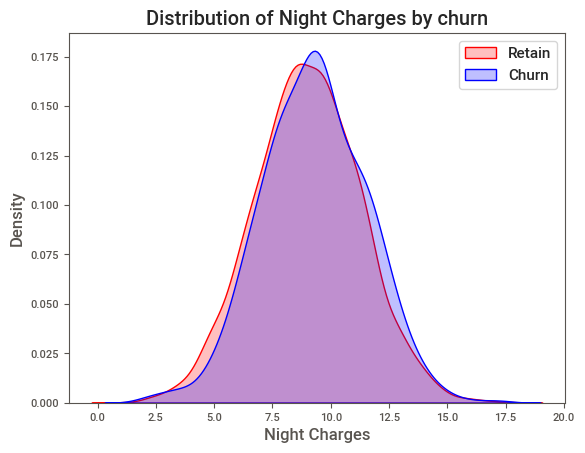

In [72]:
# Creating kernel density plots for "VMail Message" bamsed on "Churn" status.
ax = sns.kdeplot(data[data.churn == False]['night_charge'], color = "Red", fill = True)
ax = sns.kdeplot(data[data.churn == True]['night_charge'], color = "Blue", fill = True)

# Adding legend to the upper right corner, labeling the red curve as "Retain" 
# and the blue curve as "Churn"
ax.legend(["Retain", "Churn"], loc = "upper right")

# Adding labels to the x and y axes..
ax.set_xlabel("Night Charges")
ax.set_ylabel("Density")

# Adding title to the plot.
ax.set_title("Distribution of Night Charges by churn")

# Displaying the plot.
plt.show()

### (11.3.5) Kernal Density plot for 'international_charge'.

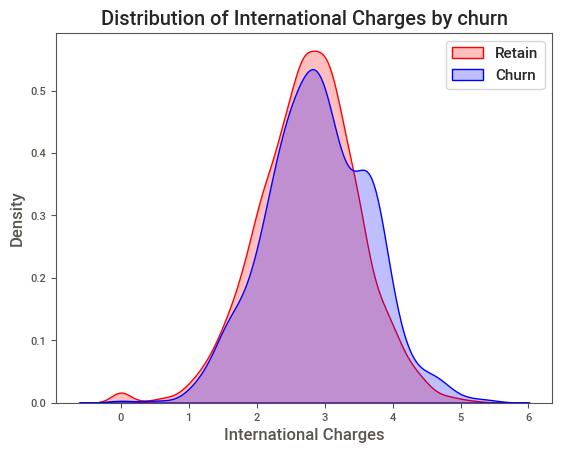

In [73]:
# Creating kernel density plots for "VMail Message" bamsed on "Churn" status.
ax = sns.kdeplot(data[data.churn == False]['international_charge'], color = "Red", fill = True)
ax = sns.kdeplot(data[data.churn == True]['international_charge'], color = "Blue", fill = True)

# Adding legend to the upper right corner, labeling the red curve as "Retain" 
# and the blue curve as "Churn"
ax.legend(["Retain", "Churn"], loc = "upper right")

# Adding labels to the x and y axes..
ax.set_xlabel("International Charges")
ax.set_ylabel("Density")

# Adding title to the plot.
ax.set_title("Distribution of International Charges by churn")

# Displaying the plot.
plt.show()

####  Insights from kde of different columns :
>- We found some columns with high correlation.

>- We decided to drop  'VMail Message,' 'Day Charge,' 'Eve Charge,' 'Night Charge,' and 'International Charge.'

>- This helps simplify things, making our model easier to understand and possibly better at predicting. We want to focus on the most important features, making the model work better and faster.

### (11.3.6) Dropping Specific Columns

In [74]:
# Columns to be dropped.
columns_to_drop = ['vmail_message', 'day_charge', 'eve_charge', 'night_charge', 'international_charge']

# Looping through each column and dropping it from the DataFrame.
for column in columns_to_drop:
    
    # Dropping the specified column along the specified axis.
    data.drop(column, axis = 1, inplace = True)

### (11.3.7) converting columns to 'int64'

In [75]:
# Columns to be converted to np.int64.
columns_to_convert = ['day_mins', 'night_mins', 'international_mins', 'eve_mins']

# Looping through each column and converting its data type to np.int64.
for column in columns_to_convert:
    
    # Converting the selected column to np.int64
    data[column] = data[column].astype(np.int64)

# Display a message indicating the completion of the conversion
print(f"Conversion of columns to np.int64 completed: {columns_to_convert}")

Conversion of columns to np.int64 completed: ['day_mins', 'night_mins', 'international_mins', 'eve_mins']


# (12) MODEL CREATION :

## (12.1) Split data into x and y.

In [76]:
# Here, 'x' is all the variables except target.

# Creating features(x) by dropping the "churn" column from the DataFrame.
x = scaled_df

# Creating the target variable (y) by extracting the 'churn' column from the DataFrame. 
y = data1[['churn']]

In [77]:
# 'x' represents the features (independent variables) of our dataset, 
# excluding the "churn" column.

x

,state,account_length,international_plan,vmail_plan,vmail_message,day_mins,day_charge,eve_mins,eve_charge,night_mins,night_charge,international_mins,international_charge,custserv_calls
0,-0.679001,0.690901,-0.327000,1.653916,1.261885,1.568293,1.568569,-0.059921,-0.059742,0.872135,0.871418,-0.101301,-0.102005,-0.433885
1,0.605758,0.160503,-0.327000,1.653916,1.335463,-0.349166,-0.349447,-0.097506,-0.096978,1.064069,1.064889,1.240707,1.241481,-0.433885
2,0.335283,0.918214,-0.327000,-0.604626,-0.577587,1.166275,1.166439,-1.567294,-1.567818,-0.752381,-0.751101,0.696649,0.690651,-1.199068
3,0.605758,-0.420409,3.058107,-0.604626,-0.577587,2.203741,2.203911,-2.740354,-2.740765,-0.073686,-0.073952,-1.334498,-1.338013,0.331298
4,0.673377,-0.647723,3.058107,-0.604626,-0.577587,-0.254682,-0.254636,-1.031207,-1.030217,-0.271556,-0.271820,-0.065031,-0.061701,1.096480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4612,0.538139,-1.102350,-0.327000,1.653916,1.261885,-0.675226,-0.675291,-0.261695,-0.262215,-0.831529,-0.830248,-0.645359,-0.639400,1.096480
4613,0.402902,1.928496,-0.327000,1.653916,1.556200,0.158452,0.158391,2.031015,2.030153,-0.732594,-0.733513,1.966116,1.966963,1.096480
4614,1.349567,-0.849779,-0.327000,1.653916,1.850515,-0.980908,-0.980430,1.892543,1.892843,0.005463,0.005195,0.986813,0.986218,-0.433885
4615,-0.273288,-0.066811,-0.327000,1.653916,1.114727,-0.213925,-0.214314,0.511773,0.512768,-0.694999,-0.693939,1.458330,1.456438,-1.199068


In [78]:
# 'y' represents the target variable (dependent variable), 
# which is the "churn" column. 

y

,churn
0,0
1,0
2,0
3,0
4,0
...,...
4612,0
4613,0
4614,0
4615,0


## (12.2) Split data for training and testing..

>- We will divide our data into training and testing.

>- It works on (70:30) or (80:20) will give best result. We will go with that result.

>- Whichever i.e, (70:30) or (80:20) will give best result. We will go with that result.

>- In order to test the model, We take a data which is not seen by Model.

In [79]:
# Importing the necessary module for splitting the dataset.
from sklearn.model_selection import train_test_split

# splitting the dataset into training and testing set.
# x_train : Features for training.
# x_test : Features for testing.
# y_train : Traget variable for training.
# y_test : Target variable for testing.
# test_size : The "test_size" parameter is set to 25% that means 25% of the dataset will be used for testing,
# While the remaining 75% data will be used for training.
# random_state : random_state is set to 42 for reproducibility, 
# It means if we run the code with the same random state, we will get the same split each time.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [80]:
# It will count the occurences of each unique value in the 'y_train' variable. 

y_train.value_counts()

churn
0        3162
1         531
Name: count, dtype: int64

In [81]:
# It will print the shape (number of rows and columns) of the training feature set (x_train). 
print("The shape of x_train: ", x_train.shape)

# It will print the shape of the testing feature set (x_test)..
print("The shape of x_test: ", x_test.shape)

# It will print the shape of the training target variable (y_train).
print("The shape of y_train", y_train.shape)

# It will print the shape of the testing target variable.
print("The shape of y_test", y_test.shape)

The shape of x_train:  (3693, 14)
The shape of x_test:  (924, 14)
The shape of y_train (3693, 1)
The shape of y_test (924, 1)


## (12.3) Balancing the Data using SMOTE

In [82]:
!pip install imblearn

In [83]:
x_train

,state,account_length,international_plan,vmail_plan,vmail_message,day_mins,day_charge,eve_mins,eve_charge,night_mins,night_charge,international_mins,international_charge,custserv_calls
3189,1.417185,-0.622466,3.058107,-0.604626,-0.577587,1.229264,1.229647,0.116137,0.117131,0.153865,0.154696,1.059354,1.053393,-1.199068
2646,0.064807,0.008961,-0.327000,-0.604626,-0.577587,0.968045,0.968099,-0.277521,-0.278506,-0.936400,-0.935778,0.442756,0.448824,2.626846
506,0.605758,0.892957,-0.327000,1.653916,1.703358,-0.691900,-0.691638,0.715526,0.715241,0.537734,0.537241,0.406486,0.408519,0.331298
393,0.808615,0.286788,-0.327000,-0.604626,-0.577587,0.679037,0.679307,0.094377,0.093858,-0.295300,-0.293806,-0.318924,-0.316963,0.331298
1183,-0.746620,1.347584,-0.327000,1.653916,1.776937,0.219588,0.219419,-0.694916,-0.695089,0.086589,0.088739,-0.464006,-0.464747,0.331298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1.146710,-0.218353,-0.327000,-0.604626,-0.577587,1.106992,1.106501,-1.836326,-1.835454,-0.871103,-0.869822,-1.008063,-1.002141,-0.433885
466,-1.152334,0.791929,-0.327000,1.653916,2.071252,0.847625,0.847133,-0.372473,-0.371597,1.151132,1.152831,0.080051,0.086083,1.096480
3092,-0.070431,-0.824522,-0.327000,-0.604626,-0.577587,-1.599682,-1.599426,-1.045054,-1.044180,0.254779,0.255828,-0.065031,-0.061701,-1.199068
3772,-0.138050,-0.041554,-0.327000,-0.604626,-0.577587,0.238114,0.237946,0.784762,0.785060,-1.086782,-1.085278,0.696649,0.690651,-0.433885


In [84]:
y_train

,churn
3189,1
2646,0
506,0
393,0
1183,0
...,...
4426,0
466,1
3092,0
3772,0


In [85]:
# Importing the SMOTE class from the imblearn library.
from imblearn.over_sampling import SMOTE

# It will create an instance of the "SMOTE" class and assign it to the variable 'smote'.
smote = SMOTE()

In [86]:
# "SMOTE" function is always applied on train data (x_train, y_train).

x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [87]:
y_smote.value_counts()

churn
0        3162
1        3162
Name: count, dtype: int64

In [88]:
# Importing the Counter class from the collections library.
from collections import Counter

# Printing the occurences of each class in the origional training data.
print("Actual Class :", Counter(y_train))

# Printing the occurences of each class after applying SMOTE.
print("SMOTE Class :", Counter(y_smote))

Actual Class : Counter({'churn': 1})
SMOTE Class : Counter({'churn': 1})


In [89]:
x_smote = x_train
y_smote = y_train

## (12.4) List of different machine learning models to try 

>- We have divided our data into training and testing sets, and now it's time to build a machine learning model. We will train the model on the training set to identify patterns and then evaluate its performance on the testing set.

>- We have selected seven different machine learning models to try :
>>-  1. `Logistic Regression`
>>-  2. `K-Nearest Neighbors Classifier`
>>-  3. `SVM Classifier`
>>-  4. `Decision Tree Classifier`
>>-  5. `Random Forest Classifier`
>>-  6. `Gradient Boosting Classifier`
>>-  7. `Xtreme Gradient Boosting Classifier`   

# (13). LOGISTIC REGRESSION :

## (13.1) Model Building

In [90]:
# Importing Logistic Regression Model.
from sklearn.linear_model import LogisticRegression

# Initializing the Model.
Log_reg = LogisticRegression()

# Training the model with 'x_train' and "y_train".
Log_reg.fit(x_smote, y_smote)

LogisticRegression()

## (13.2) Make Predictions / Test Model

In [91]:
# Training set predictions using Logistic Regression.
y_train_pred_Log_Reg = Log_reg.predict (x_smote)

# Testing set predictions using Logistic Reggresion.
y_test_pred_Log_Reg = Log_reg.predict(x_test)

## (13.3) Evaluating the Model

In [92]:
# Importing metrics for evaluating models.

from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report

## (13.3.1) Confusion Matrix
>- Crearting a ConfusionMatrixDisplay object and visualizing the confusion matrix by providing the true labels (y_test) and predicted labels (y_test_pred).

>- "xticks_rotation = 'vertical'" is used to rotate the x-axis labels vertically for better readability. 

<Figure size 700x700 with 0 Axes>

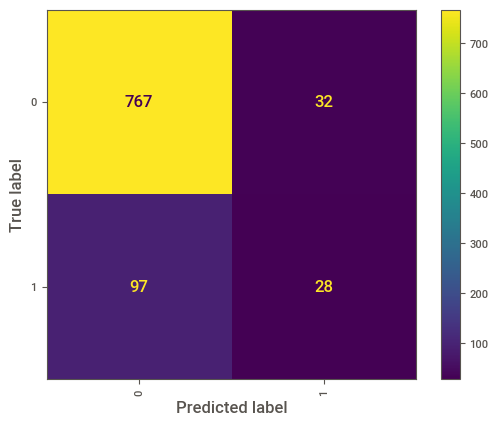

In [93]:
# Here, We are setting the figure size.
plt.figure(figsize = (7,7))

# Importing the ConfusionMatrixDisplay class from 'sklearn.metrics' module.
from sklearn.metrics import ConfusionMatrixDisplay

# Creating a confusion matrix display for logistic regression predictions on the test data.
ConfusionMatrixDisplay.from_predictions (y_test, y_test_pred_Log_Reg, xticks_rotation = 'vertical')

# Displaying the plot.
plt.show()

### (13.3.2) Accuracy Score
>- It will print the "accuracy scores" for training and testing sets using Logistic Regression.

In [94]:
# Printing the training score.
print("Logistic Regression's training score is: ", accuracy_score(y_smote, y_train_pred_Log_Reg))

# Printing the testing score.
print("Logistic Regression's testing score is: ", accuracy_score(y_test, y_test_pred_Log_Reg))

Logistic Regression's training score is:  0.8621716761440563
Logistic Regression's testing score is:  0.8603896103896104


In [95]:
# It will calculate the accuracy score for Logistic Regression on the testing set.
lr_accuracy = accuracy_score(y_test, y_test_pred_Log_Reg)

# It will display the calculated accuracy score.
lr_accuracy

0.8603896103896104

### (13.3.3) Precision Score
>- It will calculate the weighted "precision score" for the testing set.

In [96]:
# Calculating precision score using the true labels (y_test) and predicted labels (y_test_pred_Log_Reg)

precision_score(y_test, y_test_pred_Log_Reg)

0.4666666666666667

### (13.3.4) Recall Score
>- It will calculate the weighted "recall score" for the testing set.

In [97]:
# Calculating Recall score using the true labels (y_test) and predicted labels (y_test_pred_Log_Reg)

recall_score(y_test, y_test_pred_Log_Reg)

0.224

### (13.3.5) f1 score
>- It will calculate the weighted "f1 score" for the testing set.

In [98]:
# Calculating f1 score using the true labels (y_test) and predicted labels (y_test_pred_Log_Reg)

f1_score(y_test, y_test_pred_Log_Reg)

0.3027027027027027

### (13.3.6) Classification Report
>- It will print a classification report for the testing set, specifying target class names.

In [99]:
# Importing the 'classifiaction_report' from 'sklearn.metrics' module.
from sklearn.metrics import classification_report

# Printing the classifiaction report for Logistic Regression predictions on the test data.
print(classification_report(y_test, y_test_pred_Log_Reg))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       799
           1       0.47      0.22      0.30       125

    accuracy                           0.86       924
   macro avg       0.68      0.59      0.61       924
weighted avg       0.83      0.86      0.84       924



# (14) KNN (K NEAREST NEIGHBORS) CLASSIFIER :

## (14.1) Model Building

In [100]:
# Using K-Nearest Neighbors (KNN) classifier to predict target values for the x-test.

from sklearn.neighbors import KNeighborsClassifier

In [101]:
# Creating a KNeighborsclassifier instance.
knn = KNeighborsClassifier()

# Training the model with the training data.
knn.fit(x_smote, y_smote)

KNeighborsClassifier()

## (14.2) Make Predictions / Test Model

In [102]:
# Making predictions on the training data using the trained KNeighborsClassifier.
y_train_pred_KNN_CLF = knn.predict(x_smote)

# Making predictions on the testing data using the trained KNeighborsClassifier.
y_test_pred_KNN_CLF = knn.predict(x_test)

## (14.3) Evaluating the Model

### (14.3.1) Confusion Matrix
>- Creating a ConfusionMatrixDisplay object and visulaize the confusion matrix by providing the true labels (y_test) and predicted labels(y_test_pred).

>- "xticks_rotation" = 'vertical' is used to rotate the x-axis labels vertically for better readability.

<Figure size 700x700 with 0 Axes>

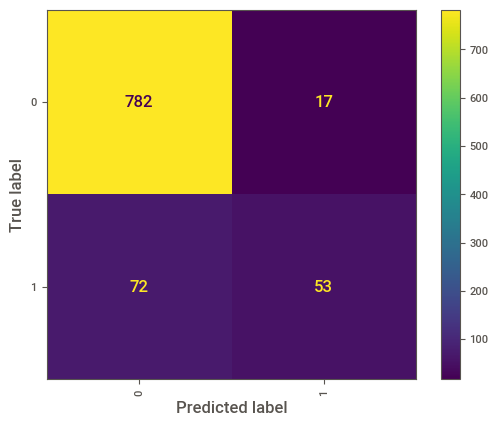

In [103]:
# Here, We are setting the figure size.
plt.figure(figsize = (7,7))

# Importing the ConfusionMatrixDisplay class from 'sklearn.metrics' module.
from sklearn.metrics import ConfusionMatrixDisplay

# Creating a confusion matrix display for logistic regression predictions on the test data.
ConfusionMatrixDisplay.from_predictions (y_test, y_test_pred_KNN_CLF, xticks_rotation = 'vertical')

# Displaying the plot.
plt.show()

### (14.3.2) Accuracy Score
>- It will print the accuracy scores for training and testing sets using KNN Classifier.

In [104]:
# Printing the training score.
print("The accuracy of training score is: ", accuracy_score(y_smote, y_train_pred_KNN_CLF))

# Printing the testing score.
print("The accuracy of testing score is: ", accuracy_score(y_test, y_test_pred_KNN_CLF))

The accuracy of training score is:  0.9347414026536691
The accuracy of testing score is:  0.9036796536796536


In [105]:
# It will calculate the accuracy score for KNN Classifier on the testing set.
knn_accuracy = accuracy_score(y_test, y_test_pred_KNN_CLF)

# It will display the calculated accuracy score.
knn_accuracy

0.9036796536796536

### (14.3.3) Precision Score
>- It will calculate the weighted "precision score" for the testing set.

In [106]:
# Calculating precision score using the true labels (y_test) and predicted labels (y_test_pred_KNN_CLF)

precision_score(y_test, y_test_pred_KNN_CLF)

0.7571428571428571

### (14.3.4) Recall Score
>- It will calculate the weighted "recall score" for the testing set.

In [107]:
# Calculating recall score using the true labels (y_test) and predicted labels (y_test_pred_KNN_CLF)

recall_score(y_test, y_test_pred_KNN_CLF)

0.424

### (14.3.5) f1 score
>- It will calculate the weighted "f1 score" for the testing set. 

In [108]:
# Calculating f1 score using the true labels (y_test) and predicted labels (y_test_pred_KNN_CLF)

f1_score(y_test, y_test_pred_KNN_CLF)

0.5435897435897435

### (14.3.6) Classification Report
>- It will print a classifiaction report for the testing set, specifying target class names.

In [109]:
# Printing the classifiaction report for KNN Classifier.

print(classification_report(y_test, y_test_pred_KNN_CLF))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       799
           1       0.76      0.42      0.54       125

    accuracy                           0.90       924
   macro avg       0.84      0.70      0.74       924
weighted avg       0.89      0.90      0.89       924



# (15) SUPPORT VECTOR CLASSIFIER (SVC) :

## (15.1) Model Building

In [110]:
# Importing Support Vector Machine (SVM) classifier from scikit-learn.
from sklearn.svm import SVC

# Creating an instance of the SVM classifier.
svc = SVC()

# Training the SVM classifier with the training data.
svc.fit(x_smote, y_smote)

SVC()

## (15.2) Make Prediction / Test Model

In [111]:
# Making predictions on the training data using the trained SVM classifier.
y_train_pred_svc = svc.predict(x_smote)

# Making predictions on the test data using the trained SVM classifier.
y_test_pred_svc = svc.predict(x_test)

In [112]:
# Printing the shape (dimensions) of the predictions on the training data. 
print(y_train_pred_svc.shape)

# Printing the shape (dimensions) of the predictions on the test data.
print(y_test_pred_svc.shape)

(3693,)
(924,)


In [113]:
# Printing the shape (dimensions) of the training data.
print(x_smote.shape)

# Printing the shape (dimensions) of the test data.
print(x_test.shape)

(3693, 14)
(924, 14)


## (15.3) Evaluating the Model

### (15.3.1) Accuracy Score
>- It will print the "accuracy scores" for training and testing sets using Logistic Regression.

In [114]:
# Printing the training score.
print("The training score is: ", accuracy_score(y_smote, y_train_pred_svc))

# Printing the tesing score.
print("The testing score is: ", accuracy_score(y_test, y_test_pred_svc))

The training score is:  0.9471974004874086
The testing score is:  0.9383116883116883


In [115]:
# It will calculate the accuracy score for Support Vector Classifier on the testing set. 
svc_accuracy = accuracy_score(y_test, y_test_pred_svc)

# It will display the calculated accuracy score.
svc_accuracy

0.9383116883116883

### (15.3.2) Precision Score
>- It will calculate the weighted "precision score" for the testing set.

In [116]:
# Calculating precision score using the true labels (y_test) and predicted labels (y_test_pred_svc)

precision_score(y_test, y_test_pred_svc)

0.9473684210526315

### (15.3.3) Recall Score
>- It will calculate the weighted "recall score" for the testing set.

In [117]:
# Calculating recall score using the true labels (y_test) and predicted labels (y_test_pred_svc)

recall_score(y_test, y_test_pred_svc)

0.576

### (15.3.4) f1 score
>- It will calculate the weighted "f1 score" for the testing set.

In [118]:
# Calculating f1 score using the true labels (y_test) and predicted labels (y_test_pred_svc)

f1_score(y_test, y_test_pred_svc)

0.7164179104477612

### (15.3.5) Classification Report
>- It will print a "classification report" for the testing set, specifying target class names. 

In [119]:
# Importing the 'classifiaction_report' from 'sklearn.metrics' module.
from sklearn.metrics import classification_report

# Printing the classification report for SVM predictions on the test data.
print(classification_report(y_test, y_test_pred_svc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       799
           1       0.95      0.58      0.72       125

    accuracy                           0.94       924
   macro avg       0.94      0.79      0.84       924
weighted avg       0.94      0.94      0.93       924



## (15.4) Checking cross validation score

In [120]:
# Importing cross_val_score from 'sklearn.model_selection'.
from sklearn.model_selection import cross_val_score

# It will calculate cross-validation scores for SVM classification using 3 folds and accuracy as the scoring metric. 
scores = cross_val_score(svc, x, y, cv = 5, scoring = 'accuracy', verbose = 3, n_jobs = -1)

# It will print the individual cross-validation scores.
print(scores)

# It will print the mean cross-validation score.
print("Cross validation Score:", scores.mean())

# It will print the standard deviation of the cross-validation scores.
print("Std :", scores.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    4.9s remaining:    7.4s


[0.93506494 0.92965368 0.92307692 0.93499458 0.92741062]
Cross validation Score: 0.9300401476457815
Std : 0.0045901023853253


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.3s finished


## (15.5) Hyperparameter Tuning on Support Vector Classifier

### (15.5.1) Applying GridSearchCV

In [121]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf'] }

model = SVC()
grid = GridSearchCV(model, param_grid, scoring = 'accuracy', cv = 5, verbose = 2)

In [122]:
# fitting the model for grid search

grid.fit(x,y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   1.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.3s
[CV] END ......................C=0.1, gamma=0.0

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=2)

In [123]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_score_)

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
0.9337209738618188


### (15.5.2) Model Building

In [124]:
model = SVC(C = 5, gamma = 0.1, kernel = 'rbf', random_state = 42)
model.fit(x_smote, y_smote)

SVC(C=5, gamma=0.1, random_state=42)

### (15.5.3) Make Prediction / Test Model

In [125]:
y_svc_train_pred = model.predict(x_smote) # training model
y_svc_test_pred = model.predict(x_test) # testing model

### (15.5.4) Evaluating the Model

#### (15.5.4.1) Confusion Matrix
>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels (y_test) and predicted labels (y_test_pred).

>- xticks_rotation='vertical' is used to rotate the x-axis labels vertically for better readability.

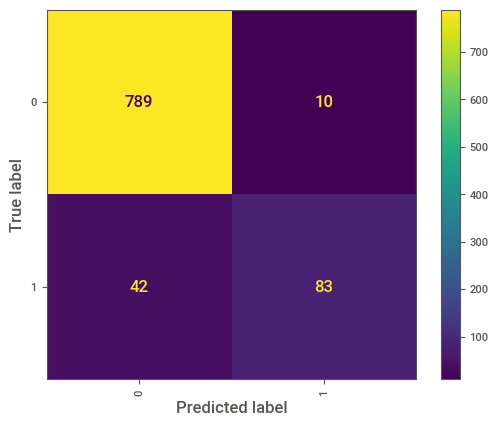

In [126]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_svc_test_pred, xticks_rotation='vertical')

#### (15.5.4.2) Accuracy Score
>- It will print the accuracy scores for training and testing sets using Logistic Regression.

In [127]:
print("The training score is: ", accuracy_score(y_smote, y_svc_train_pred))
print("The testing score is: ", accuracy_score(y_test, y_svc_test_pred))

The training score is:  0.9694015705388573
The testing score is:  0.9437229437229437


In [128]:
# It will calculate the accuracy score for SVM Classifier on the testing set. 
svc_accuracy = accuracy_score(y_test,  y_svc_test_pred)

# It will display the calculated accuracy score.
svc_accuracy

0.9437229437229437

#### (15.5.4.3) Precision score
>- It will calculate the weighted precision score for the testing set.

In [129]:
# Calculating precision score using the true labels (y_test) and predicted labels (y_test_pred_svc)

precision_score(y_test, y_svc_test_pred)

0.8924731182795699

#### (15.5.4.4) Recall Score
>- It will calculate the weighted recall score for the testing set.

In [130]:
# Calculating recall score using the true labels (y_test) and predicted labels (y_test_pred_svc)

recall_score(y_test, y_svc_test_pred)

0.664

#### (15.5.4.5) f1 score
>- It will calculate the weighted f1 score for the testing set.

In [131]:
# Calculating f1 score using the true labels (y_test) and predicted labels (y_test_pred_svc)

f1_score(y_test, y_svc_test_pred)

0.7614678899082569

#### (15.5.4.6) Classification Report
>- It will print a classification report for the testing set, specifying target class names.

In [132]:
# Importing 'classification_report' from 'sklearn.metrics'.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_svc_test_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       799
           1       0.89      0.66      0.76       125

    accuracy                           0.94       924
   macro avg       0.92      0.83      0.86       924
weighted avg       0.94      0.94      0.94       924



# (16) DECISION TREE :

## (16.1) Model Building

In [133]:
# Importing DecisionTreeClassifier from the 'sklearn.tree'.
from sklearn.tree import DecisionTreeClassifier

# Creating a DecisionTreeClassifier instance.
dt = DecisionTreeClassifier()

# Training the model with the training data.
dt.fit(x_smote, y_smote)

DecisionTreeClassifier()

## (16.2) Make Prediction / Test Model

In [134]:
# Making predictions on the test data using the trained Decision Tree Classifier.
y_train_pred_DTC = dt.predict(x_test)

# The predicted labels are stored in the variable 'y_dt_pred_DTC'.
y_train_pred_DTC

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

In [135]:
# Making predictions on the training data using the trained Decision Tree Clasifier.
y_train_pred_DTC = dt.predict(x_smote)

# Making predictions on the test data using the trained DecisionTreeClassifier.
y_test_pred_DTC = dt.predict(x_test)

In [136]:
# Printing the shape (dimensions) of the training data.
print(y_train_pred_DTC.shape)

# Predictng the shape (dimensions) of the test data predictions.
print(y_test_pred_DTC.shape)

(3693,)
(924,)


In [137]:
# Printing the shape (dimensions) of the training data.
print(x_smote.shape)

# Printing the shape (dimensions) of the test data.
print(x_test.shape)

(3693, 14)
(924, 14)


## (16.3) Evaluating the Model

### (16.3.1) Confusion Matrix
>- Create a ConfusionMarixDisplay object and visualize the confusion matrix by providing the true labels (y_test) and predicted labels (y_test_pred).

>- "xticks_rotation = 'vertical'" is used to rotate the x-axis labels for better readability.

<Figure size 700x700 with 0 Axes>

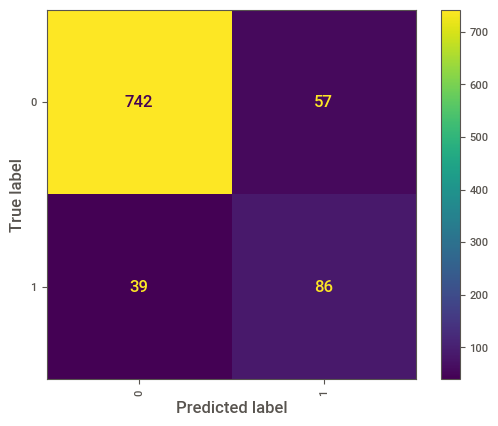

In [138]:
# Here, We are setting the figure size.
plt.figure(figsize = (7,7))

# Importing the ConConfusionMatrixDisplay class from 'sklearn.metrics' module.
from sklearn.metrics import ConfusionMatrixDisplay

# Creating a confusion matrix display for Decision Tree predictions on the test data.
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_DTC, xticks_rotation = 'vertical')

# Displaying the plot.
plt.show()

### (16.3.2) Accuracy Score
>- It will print the accuracy scores for training and testing sets using Decision Tree Classifier.

In [139]:
# Printing the training score.
print("The training accuracy is: ", accuracy_score(y_smote, y_train_pred_DTC))

# Printing the testing score.
print("The testing accuracy is: ", accuracy_score(y_test, y_test_pred_DTC))

The training accuracy is:  1.0
The testing accuracy is:  0.8961038961038961


In [140]:
# It will calculate the accuracy score for Decision Tree Classifier on the testing set.
dt_accuracy = accuracy_score(y_test, y_test_pred_DTC)

# It will display the calculated accuracy score.
dt_accuracy

0.8961038961038961

### (16.3.3) Precision Score
>- It will calcualte the weighted "precision score" for the testing set.

In [141]:
# Calculating precision score using the true labels (y_test) and predicted labels (y_test_pred_DTC)

precision_score(y_test, y_test_pred_DTC)

0.6013986013986014

### (16.3.4) Recall Score
>- It will calculate the weighted "recall score" for the testing data.

In [142]:
# Calculating recall score using the true labels (y_test) and predicted labels (y_test_pred_DTC)

recall_score(y_test, y_test_pred_DTC)

0.688

### (16.3.5) f1 score
>- It will calculate the weighted "f1 score" for the testing set.

In [143]:
# Calculating f1 score using the true labels (y_test) and predicted labels (y_test_pred_DTC)

f1_score(y_test, y_test_pred_DTC)

0.6417910447761194

### (16.3.6) Classification Report
>- It will print a classification report for the testing set, specifying target class names.

In [144]:
# Printing the classification report for Decision Treee Classifier.

print(classification_report(y_test, y_test_pred_DTC))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       799
           1       0.60      0.69      0.64       125

    accuracy                           0.90       924
   macro avg       0.78      0.81      0.79       924
weighted avg       0.90      0.90      0.90       924



# (17) RANDOM FOREST CLASSIFIER :

## (17.1) Model Building

In [145]:
# Using Random Forest Classifier to predict target valeus for the x_test.
from sklearn.ensemble import RandomForestClassifier

# Creating an instance of RanRandomForestClassifier instance.
rf = RandomForestClassifier()

# Training the model with the training data.
rf.fit(x_smote, y_smote)

RandomForestClassifier()

## (17.2) Make Prediction / Test Model

In [146]:
# Making predictions on the training data using the trained RandomForestClassifier.
y_train_pred_RFC = rf.predict(x_smote)

# Making predictions on the test data using the trained RandomForestClassifier.
y_test_pred_RFC = rf.predict(x_test)

In [147]:
# Printing the shape (dimensions) of the train data predictions.
print(y_train_pred_RFC.shape)

# Printing the shape (dimensions) of the test data predictions.
print(y_test_pred_RFC.shape)

(3693,)
(924,)


In [148]:
# Printing the shape (dimensions) of the training data.
print(x_smote.shape)

# Printing the shape (dimensions) of the test data.
print(x_test.shape)

(3693, 14)
(924, 14)


## (17.3) Evaluating the Model

### (17.3.1) Confusion Matrix
>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels (y_test) and predicted labels (y_test_pred)

>- "x_ticks_rotation = 'vertical'" is used to rotate the x-axis labels vertically for better readability.

<Figure size 700x700 with 0 Axes>

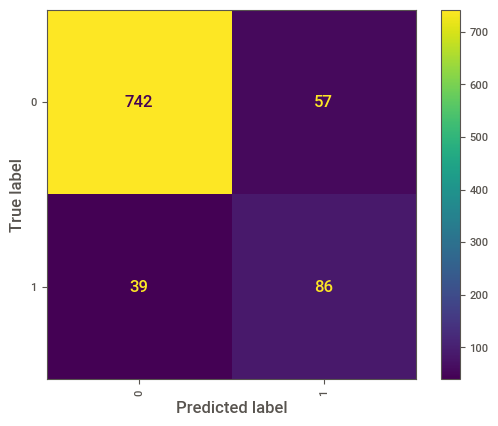

In [149]:
# Here, We are setting the figure size.
plt.figure(figsize = (7,7))

# Importing the ConfusionMatrixDisplay class from 'sklearn.metrics' module.
from sklearn.metrics import ConfusionMatrixDisplay

# Creating a confusion matrix display for Random Forest Classifier predictions on the test data.
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_DTC, xticks_rotation = 'vertical')

# Displaying the plot.
plt.show()

### (17.3.2) Accuracy Score
>- It will print the "accuracy scores" for training and testing sets using Logistic Regression.

In [150]:
# Printing the training score.
print("The training Accuracy is: ", accuracy_score(y_smote, y_train_pred_RFC))

# Printing the testing score.
print("The testing Accuracy is: ", accuracy_score(y_test, y_test_pred_RFC))

The training Accuracy is:  1.0
The testing Accuracy is:  0.9458874458874459


In [151]:
# It will calculate the accuracy score for Random Forest Classifier on the testing set.
RF_accuracy = accuracy_score(y_test, y_test_pred_RFC)

# It will display the calculated accuracy score.
RF_accuracy

0.9458874458874459

### (17.3.3) Precision Score
>- It will calculate the weighted "precision score" for the testing set.

In [152]:
# Calculating precision score using the true labels (y_test) and predicted labels (y_test_pred_RFC)

precision_score(y_test, y_test_pred_RFC)

0.9310344827586207

### (17.3.4) Recall Score
>- It will calculate the weighted "recall score" for the testing set.

In [153]:
# Calculating recall score using the true labels (y_test) and predicted labels (y_test_pred_RFC)

recall_score(y_test, y_test_pred_RFC)

0.648

### (17.3.5) f1 Score
>- It will calculate the weighted "f1 score" for the testing set.

In [154]:
# Calculating f1 score using the true labels (y_test) and predicted labels (y_test_pred_RFC)

f1_score(y_test, y_test_pred_RFC)

0.7641509433962265

### (17.3.6) Classification Report
>- It will print a classification report for the testing set, specifying target class names.

In [155]:
# Printing the classification report for Random Forest Classifier.

print(classification_report(y_test, y_test_pred_RFC))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       799
           1       0.93      0.65      0.76       125

    accuracy                           0.95       924
   macro avg       0.94      0.82      0.87       924
weighted avg       0.95      0.95      0.94       924



# (18) GRADIENT BOOSTING CLASSIFIER :

## (18.1) Model Building

In [156]:
# Importing GradientBoostingClassifier from 'sklearn.ensemble'.
from sklearn.ensemble import GradientBoostingClassifier

# Initializing the model.
gbc = GradientBoostingClassifier()

# Training the model with 'x_train' and 'y_train'.
gbc.fit(x_smote, y_smote)

GradientBoostingClassifier()

## (18.2) Make Prediction / Test Model

In [157]:
# Making predictions on the training data using the trained GradientBoostingClassifier.
y_train_pred_GBC = gbc.predict(x_smote)

# Making prdictions on the test data using the trained GradientBoostingClassifier.
y_test_pred_GBC = gbc.predict(x_test)

In [158]:
# Printing the shape (dimensions) of the predictions on the training data.
print(y_train_pred_GBC.shape)

# Printing the shape (dimensions) of the predictions on the test data.
print(y_test_pred_GBC.shape)

(3693,)
(924,)


In [159]:
# Printing the shape (dimensions) of the training data.
print(x_smote.shape)

# Printing the shape (dimensions) of the test data.
print(x_test.shape)

(3693, 14)
(924, 14)


## (18.3) Evaluating the Model

### (18.3.1) Confusion Matrix
>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels (y_test) and predicted labels (y_test_pred).
>- "
xticks_rotatio n ='vertical"' is used to rotate the x-axis labels vertically for better readability.

<Figure size 700x700 with 0 Axes>

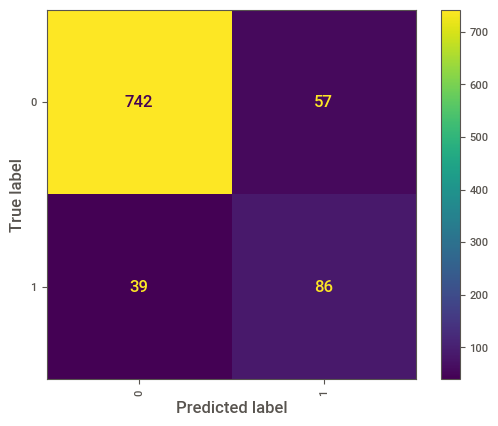

In [160]:
# Here, We are setting the figure size.
plt.figure(figsize = (7,7))

# Importing the ConfusionMatrixDisplay class from 'sklearn.metrics' module.
from sklearn.metrics import ConfusionMatrixDisplay

# Creating a confusion matrix display for Gradient Boosting Classifier predictions on the test data.
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_DTC, xticks_rotation = 'vertical')

# Displaying the plot.
plt.show()

### (18.3.2) Accuracy Score
>- It will print the "accuracy scores" for the training and testing sets using Logistic Regression.

In [161]:
# Printing the training score.
print("The Training accuracy: ", accuracy_score(y_smote, y_train_pred_GBC))

# Printing the testing score.
print("The Testing accuracy: ", accuracy_score(y_test, y_test_pred_GBC))

The Training accuracy:  0.9545085296506904
The Testing accuracy:  0.9372294372294372


In [162]:
# It will calculate the accuracy score for GradientGradientBoostingClassifier.
gbc_accuracy = accuracy_score(y_test, y_test_pred_GBC)

# It will display the calculated accuracy score.
gbc_accuracy

0.9372294372294372

### (18.3.3) Precision Score
>- It will calculate the weighted "precision score" for the testing set.

In [163]:
# Calculating precision score using the true labels (y_test) and predicted labels (y_test_pred_GBC)

precision_score(y_test, y_test_pred_GBC)

0.8941176470588236

### (18.3.4) Recall Score
>- It will calculate the weighted "recall score" for the testing set.

In [164]:
# Calculating precision score using the true labels (y_test) and predicted labels (y_test_pred_GBC)

recall_score(y_test, y_test_pred_GBC)

0.608

### (18.3.5) f1 Score
>- It will calculate the weighted "f1 score" for the testing set.

In [165]:
# Calculating f1 score using the true labels (y_test) and predicted labels (y_test_pred_GBC)

f1_score(y_test, y_test_pred_GBC)

0.7238095238095238

### (18.3.6) Classification Report
>- It will print a classification report for the testing set, specifying target class names.

In [166]:
# Printing the classification report for random Forest Classifier.

print(classification_report(y_test, y_test_pred_GBC))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       799
           1       0.89      0.61      0.72       125

    accuracy                           0.94       924
   macro avg       0.92      0.80      0.84       924
weighted avg       0.94      0.94      0.93       924



# (19) XTREME GRADIENT BOOSTING CLASSIFIER :

## (19.1) Model Building

In [167]:
pip install xgboost

In [168]:
# Importing the XGBClassifier fromthe xgboost library.
from xgboost import XGBClassifier

# Creating a XGBClassifier instance.
xgb = XGBClassifier()

# Training the model with the training data i.e, 'x_train' and 'y_train'.
xgb.fit(x_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

## (19.2) Make Prediction / Test Model

In [169]:
# Making predictions on the training data using the tarined XGBClassifier.
y_train_pred_XGB_CLF = xgb.predict(x_smote)

# Making predictions on the test data using the trained XGBClassifier.
y_test_pred_XGB_CLF = xgb.predict(x_test)

In [170]:
# Printing the shape (dimensions) of the training data predictions.
print(y_train_pred_XGB_CLF.shape)

# Printing the shape (dimensins) of the test data predictions.
print(y_test_pred_XGB_CLF.shape)

(3693,)
(924,)


## (19.3) Evaluating the Model

### (19.3.1) Confusion Matrix
>- Creating a ConfusionMatrixDisplay object and visualize the confusion matrix by providing the true labels (y_test) and predicted labels (y_test_pred).
>- "
xticks_rotatio n ='vertical"' is used to rotate the x-axis labels vertically for better readability.

<Figure size 700x700 with 0 Axes>

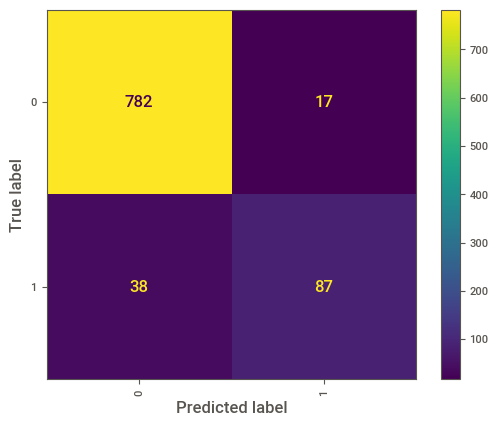

In [171]:
# Here, We are setting the figure size.
plt.figure(figsize = (7,7))

# Importing the ConfusionMatrixDisplay class from 'sklearn.metrics' module.
from sklearn.metrics import ConfusionMatrixDisplay

# Creating a confusion matrix display for  XGBClassifier predictions on the test data.
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred_XGB_CLF, xticks_rotation = 'vertical')

# Displaying the plot.
plt.show()

### (19.3.2) Accuracy Score
>- It will print the "accuracy scores" of training and etsting sets using Logistic Regression.

In [172]:
# Printing the training score.
print("The Training accuracy is: ", accuracy_score(y_smote, y_train_pred_XGB_CLF))

# Printing the testing score.
print("The Testing accuracy is: ", accuracy_score(y_test, y_test_pred_XGB_CLF))

The Training accuracy is:  0.9997292174383969
The Testing accuracy is:  0.9404761904761905


In [173]:
# It will calculate the accuracy score for the XGBClassifier on the testing set.
xgb_accuracy = accuracy_score(y_test, y_test_pred_XGB_CLF)

# It will display the calculated accuracy score.
xgb_accuracy

0.9404761904761905

### (19.3.3) Precision Score
>- It will calculate the weighted "precision score" for the weighted average on the testing data.

In [174]:
# Calculating precision score using the true labels (y_test) and predicted labels (y_test_pred_XGB_CLF)

precision_score(y_test, y_test_pred_XGB_CLF)

0.8365384615384616

### (19.3.4) Recall Score
>- It will calculate the weighted "recall score" for the testing set.

In [175]:
# Calculating recall score using the true labels (y_test) and predicted labels (y_test_pred_XGB_CLF)

recall_score(y_test, y_test_pred_XGB_CLF)

0.696

### (19.3.5) f1 Score
>- It will calculate the weighted "f1 score" for the testing set.

In [176]:
# Calculating f1 score using the true labels (y_test) and predicted labels (y_test_pred_XGB_CLF)

f1_score(y_test, y_test_pred_XGB_CLF)

0.759825327510917

### (19.3.6) Classification Report
>- Printing the classification report for the test set.

In [177]:
# Printing the classification report for XGBClassifier.

print(classification_report(y_test, y_test_pred_XGB_CLF))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       799
           1       0.84      0.70      0.76       125

    accuracy                           0.94       924
   macro avg       0.90      0.84      0.86       924
weighted avg       0.94      0.94      0.94       924



# (20) DATAFRAME TO COMPARE MODEL PERFORMANCE :

In [178]:
# We are creating the DataFrame to compare model performance.
Model_Comparison = pd.DataFrame ({
    
    'Model' : [
        'Logistic Regressor ()',
        'KNN Classifier ()',
        'Support Vector Classifier ()',
        'Decision Tree Classifier ()',
        'Random Forest Classifier ()',
        'Gradient Boosting Classifier ()',
        'XG Boosting Classifier ()',
    ],

    'Train Score' : [
        accuracy_score(y_smote, y_train_pred_Log_Reg),
        accuracy_score(y_smote, y_train_pred_KNN_CLF),
        accuracy_score(y_smote, y_train_pred_svc),
        accuracy_score(y_smote, y_train_pred_DTC),
        accuracy_score(y_smote, y_train_pred_RFC),
        accuracy_score(y_smote, y_train_pred_GBC),
        accuracy_score(y_smote, y_train_pred_XGB_CLF),
                       
     ],

    'Test Score': [
        accuracy_score(y_test, y_test_pred_Log_Reg),
        accuracy_score(y_test, y_test_pred_KNN_CLF),
        accuracy_score(y_test, y_test_pred_svc),
        accuracy_score(y_test, y_test_pred_DTC),
        accuracy_score(y_test, y_test_pred_RFC),
        accuracy_score(y_test, y_test_pred_GBC),
        accuracy_score(y_test, y_test_pred_XGB_CLF),]})

# Adjusting the index to start from 1.
Model_Comparison.index = Model_Comparison.index + 1

# It will display the DataFrame.
Model_Comparison

,Model,Train Score,Test Score
1,Logistic Regressor (),0.862172,0.860390
2,KNN Classifier (),0.934741,0.903680
3,Support Vector Classifier (),0.947197,0.938312
4,Decision Tree Classifier (),1.000000,0.896104
5,Random Forest Classifier (),1.000000,0.945887
6,Gradient Boosting Classifier (),0.954509,0.937229
7,XG Boosting Classifier (),0.999729,0.940476


# (21) TRAINING AND TEST SCORE COMPARISON OF CLASSIFICATION MODELS : 

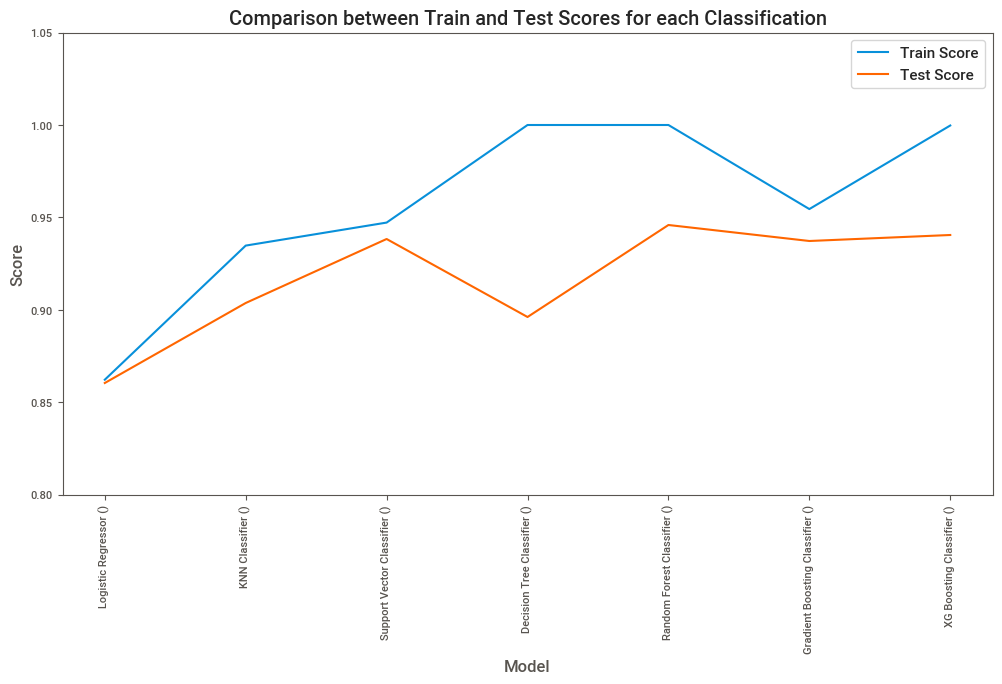

In [179]:
# Extracting model names, train scores, and test scores from the DataFrame.
model_names = Model_Comparison['Model'].tolist()
train_scores = Model_Comparison['Train Score'].tolist()
test_scores = Model_Comparison['Test Score'].tolist()

# Here, We are setting up the size of the plot.
plt.figure(figsize = (12, 6))

# Plotting the train scores for each model with blue color.
plt.plot(model_names, train_scores, label = 'Train Score', color = '#0890DA')

# Plotting the test scores for each model with orange color.
plt.plot(model_names, test_scores, label = 'Test Score', color = '#FF6600')

# Adding a Legend to the plot.
plt.legend()

# Rotatingx-axis labels for better readability.
plt.xticks(rotation = 90)

# Adding Labels to the x and y axes.
plt.xlabel('Model')
plt.ylabel('Score')

# Setting y-axis limits for better visualization.
plt.ylim(0.800, 1.05)

# Adding a 'title' to the plot.
plt.title('Comparison between Train and Test Scores for each Classification')

# Displaying the plot.
plt.show()

# (22) RESULT :

## (22.1) Comparison of the Best Models Evaluated by Cross Validation

**LogisticRegression** :- 0.860

**KNN Classifier** :- 0.903

**SupportVector Classifier** :- 0.943

**Decision Tree Classsifier** :- 0.896

**Random Forest Classifier** :- 0.945

**Gradient Boosting Classifier** :- 0.937

**Xtreme Gradient Boosting Classifier** :- 0.940

In [180]:
# Creating a list of 'Accuracy Score' for different algorithms.
scores = [lr_accuracy, knn_accuracy, svc_accuracy, dt_accuracy, 
          RF_accuracy, gbc_accuracy, xgb_accuracy]

# List of algorithm names.
algorithms = ["Logistic Regression", "KNN Classifier", "Support Vector Classifier",
              "Decision Tree Classifier", "Random Forest Classifier", "Gradient Boosting Classifier",
              "Xtreme Gradient Boosting Classifier"]

# Looping through each algorithm and printing its Accuracy Score.
for i in range(len(algorithms)) :

   print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+"%")

The accuracy score achieved using Logistic Regression is: 0.8603896103896104%
The accuracy score achieved using KNN Classifier is: 0.9036796536796536%
The accuracy score achieved using Support Vector Classifier is: 0.9437229437229437%
The accuracy score achieved using Decision Tree Classifier is: 0.8961038961038961%
The accuracy score achieved using Random Forest Classifier is: 0.9458874458874459%
The accuracy score achieved using Gradient Boosting Classifier is: 0.9372294372294372%
The accuracy score achieved using Xtreme Gradient Boosting Classifier is: 0.9404761904761905%


## (22.2) Creating a bar plot to visualize Accuracy scores for different algorithms.

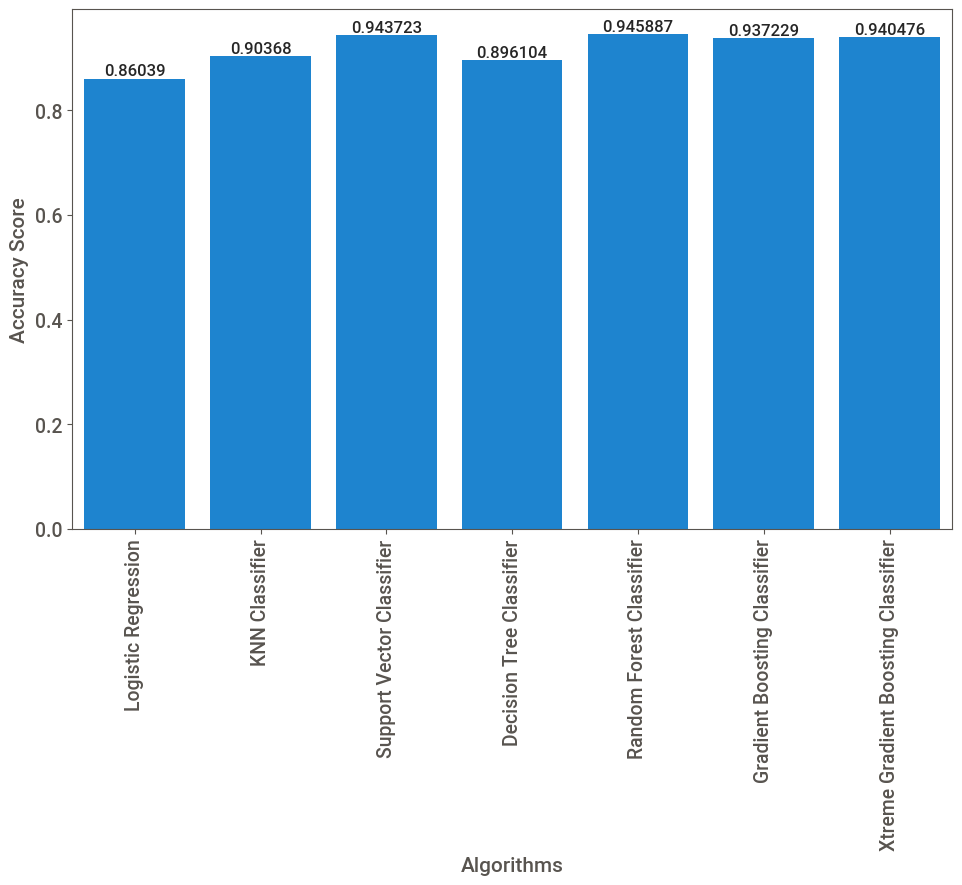

In [181]:
# Here, We are setting the figure size of the plot.
plt.figure(figsize=(10,6))

# Adding labels to the axes.
plt.xlabel("Algorithms", fontsize = 15)
plt.ylabel("Accuracy Score", fontsize = 15)

# Using seaborn to creat a bar plot.
ax = sns.barplot(x = algorithms, y = scores)

# Adding labels to the each bar in the plot.
for label in ax.containers:
    ax.bar_label(label)
    
# Ensuring tight layout for a clean presentation.
plt.tight_layout()

# it will rotate the x-tick labels by 90 degree for better readability.
plt.xticks(rotation = 90)

# Adjusting tick label font size for better readability.
plt.tick_params(labelsize = 14)

# It will display the plot.
plt.show()

# (23) PROJECT SUMMARY :

### Variables influencing the customers to migrate :

**1. Customer Service Calls :**
>- Finding out why some customers are leaving by looking into problems during their calls for help.

**2. International_calls :**
>- Checking how much we charge for calls to other countries at different times.


**3. Day and Evening Charges :**
>- Create special deals for better prices, especially when lots of people are using the service.

**4. Customer Feedback :**
>- Ask customers what they think about our charges to understand what bothers them.

>- Highlight the benefits of different services and plans to justify the charges.

| S No | Algorithm                            | Accuracy Score |
|------|--------------------------------------|-----------------|
| 1    | Logistic Regression                  | 0.860           |
| 2    | KNN Classifier                       | 0.903           |
| 3    | Support Vector Classifier            | 0.943           |
| 4    | Decision Tree Classifier             | 0.896           |
| 5    | Random Forest Classifier             | 0.945           |
| 6    | Gradient Boosting Classifier         | 0.937           |
| 7    | Xtreme Gradient Boosting Classifier  | 0.940           |

# (24) CONCLUSION :

>- From the above result table , we can conclude that  Random forest classification and Support Vector Classifier gives high accuracy of 0.945 and 0.943.

>- So, Our Random forest classification had a 94.3% accuracy, making it the best model for predicting customer churn.

>- By dealing with these important factors, No-Churn Telecom can keep more customers and make them want to stay.

> 
The Churn_flag column can be used to create special campaigns that encourage customers to stay with the telecom compay.
 

#### This understanding can help the company retain its customer base and maintain a competitive edge in the industry.

# (25) CHALLENGES FACED :

#### 1. Finding Important Signs:
**Problem:**
>- Figuring out what shows a customer will definitely stay.

**Challenge:**
>- Selecting the right clues about happy customers can be tricky when there are so few unhappy ones to learn from.





#### 2. Navigating Feature Selection Complexity:

**Problem:**
>- Picking the right info from our data was tricky.

**Insight:** 
>- Our data is full of details and a bit complicated.

**Solution:** 
>- Needed to be careful choosing what parts to use in our model.